In [1]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import rasterio.features
import rasterio.warp
from graph_structure import *
dir_dataset = Path('.')
from tools import quantile_prediction_error

regions = gpd.read_file(dir_dataset / 'regions/regions.geojson')

/home/caron/Bureau/.conda/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
self.numCluster = self.oriLen // (self.scale * 6)

In [27]:
(len(regions) / 4) // 6

149.0

2024-05-21 15:13:42,924 [INFO ]  Create node via KMEANS
2024-05-21 15:13:42,959 [INFO ]  Creating node list
2024-05-21 15:13:43,058 [INFO ]  Creating edges list


<Axes: >

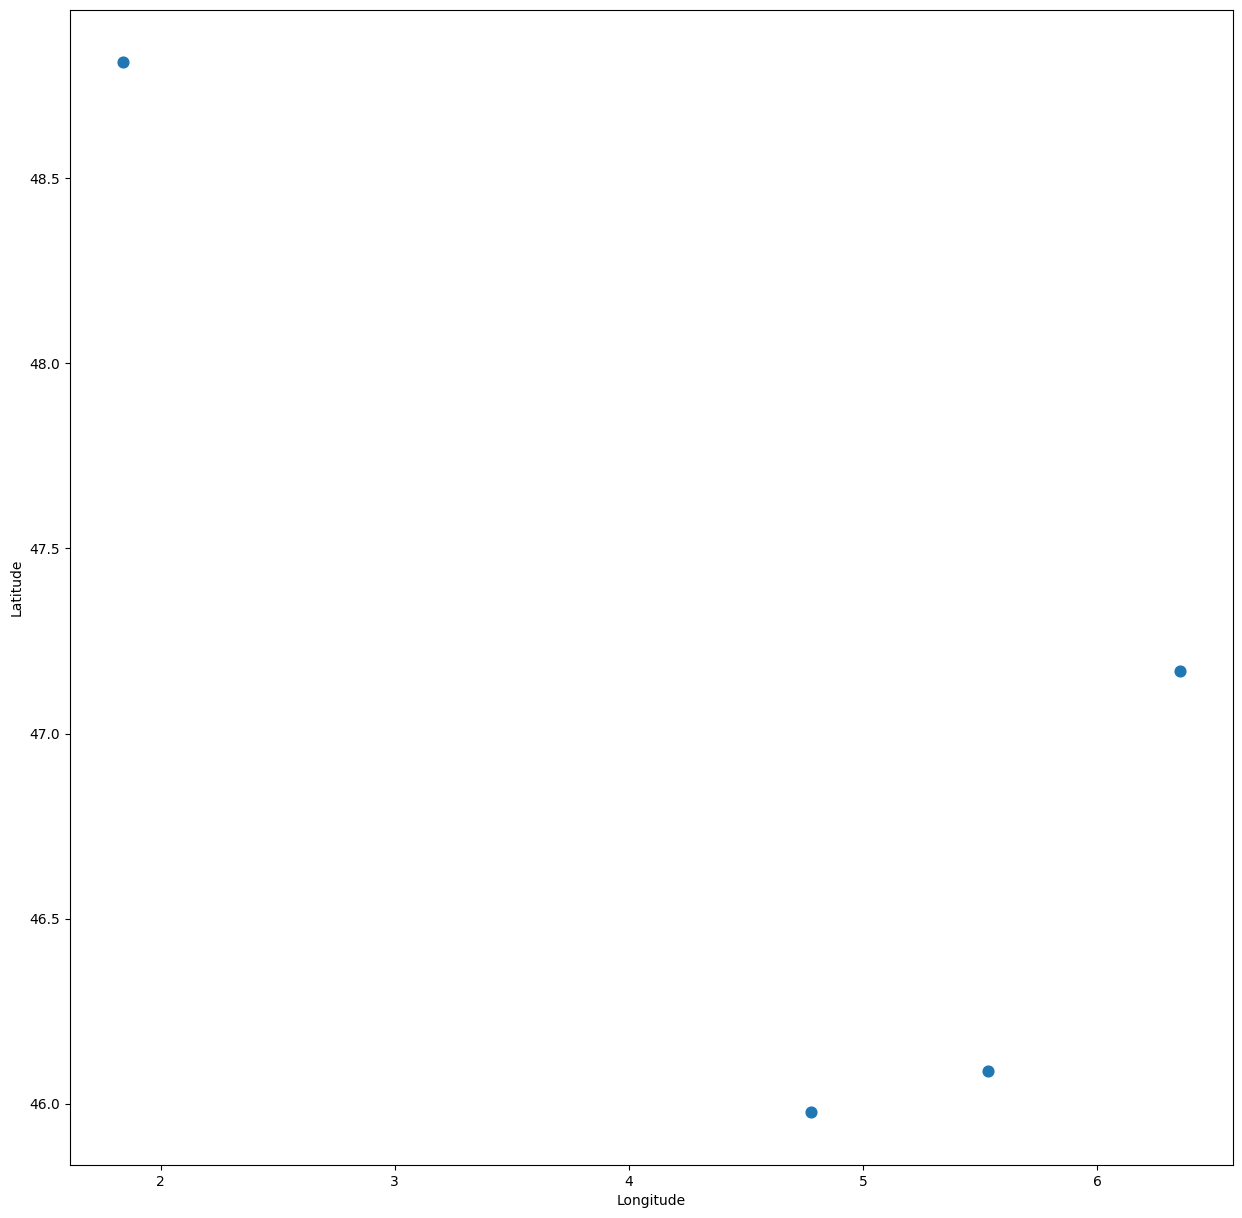

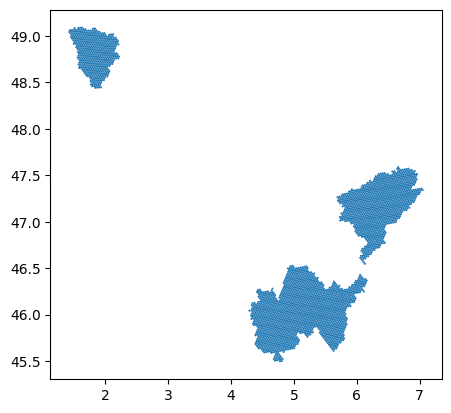

In [31]:
maxDist = {0 : 5,
           1 : 10,
           2 : 15,
           3 : 15,
        4 : 20,
        5 : 25,
        6 : 30,
        7 : 35,
        8 : 35,
        9 : 35,
        10 : 35,
        149: 5,
        }

scale = 149
graph = GraphStructure(scale, regions, maxDist[scale], numNei=6)
graph._train_kmeans(False, Path('./'), sinister='firepoint')
graph._create_nodes_list()
graph._create_edges_list()
graph._plot(graph.nodes)
regions.plot()

In [11]:
graph = read_object('graph_15.pkl', Path('final/firepoint/2x2/train'))
graph._plot(graph.nodes)

In [12]:
X = list(zip(regions.longitude, regions.latitude))
regions['id'] = graph._predict_node(X)
fig, ax = plt.subplots(1, figsize=(15,10))
regions.plot('id', ax=ax)

<Axes: >

In [4]:
alldates = find_dates_between('2017-06-12', '2023-09-12')

In [5]:
pt = pd.read_csv('points100.csv')
pt.date.unique()

pt['datestr'] = [alldates[date] for date in pt.date]
pt['month'] = pt['datestr'].apply(lambda x : int(x.split('-')[1]))
pt['year'] = pt['datestr'].apply(lambda x : int(x.split('-')[0]))

FileNotFoundError: [Errno 2] No such file or directory: 'points100.csv'

<Axes: >

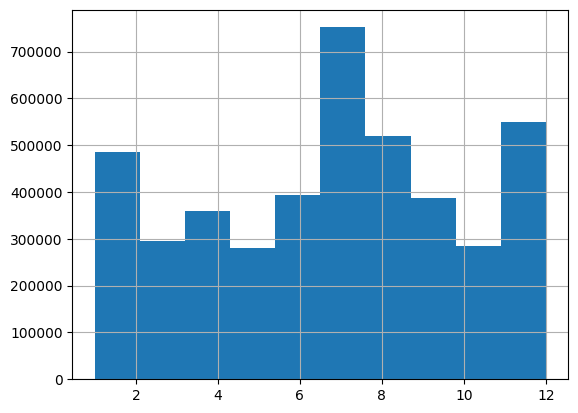

In [ ]:
pt['month'].hist()

<Axes: >

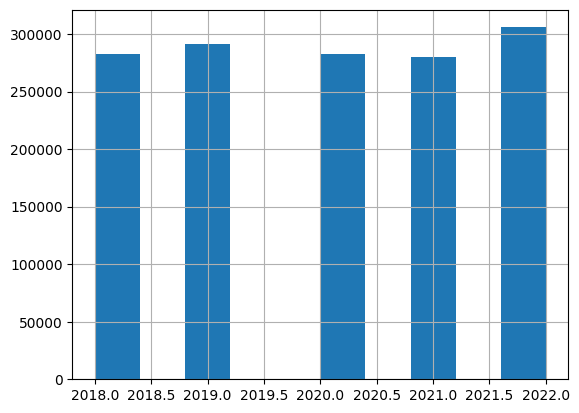

In [ ]:
pt[pt['departement'] == 1]['year'].hist()

In [ ]:
alldates[1404]

'2021-04-16'

In [ ]:
bin.shape

(38, 28, 2282)

[ 0.  1.  2.  3.  4.  5. nan]
2021-07-21


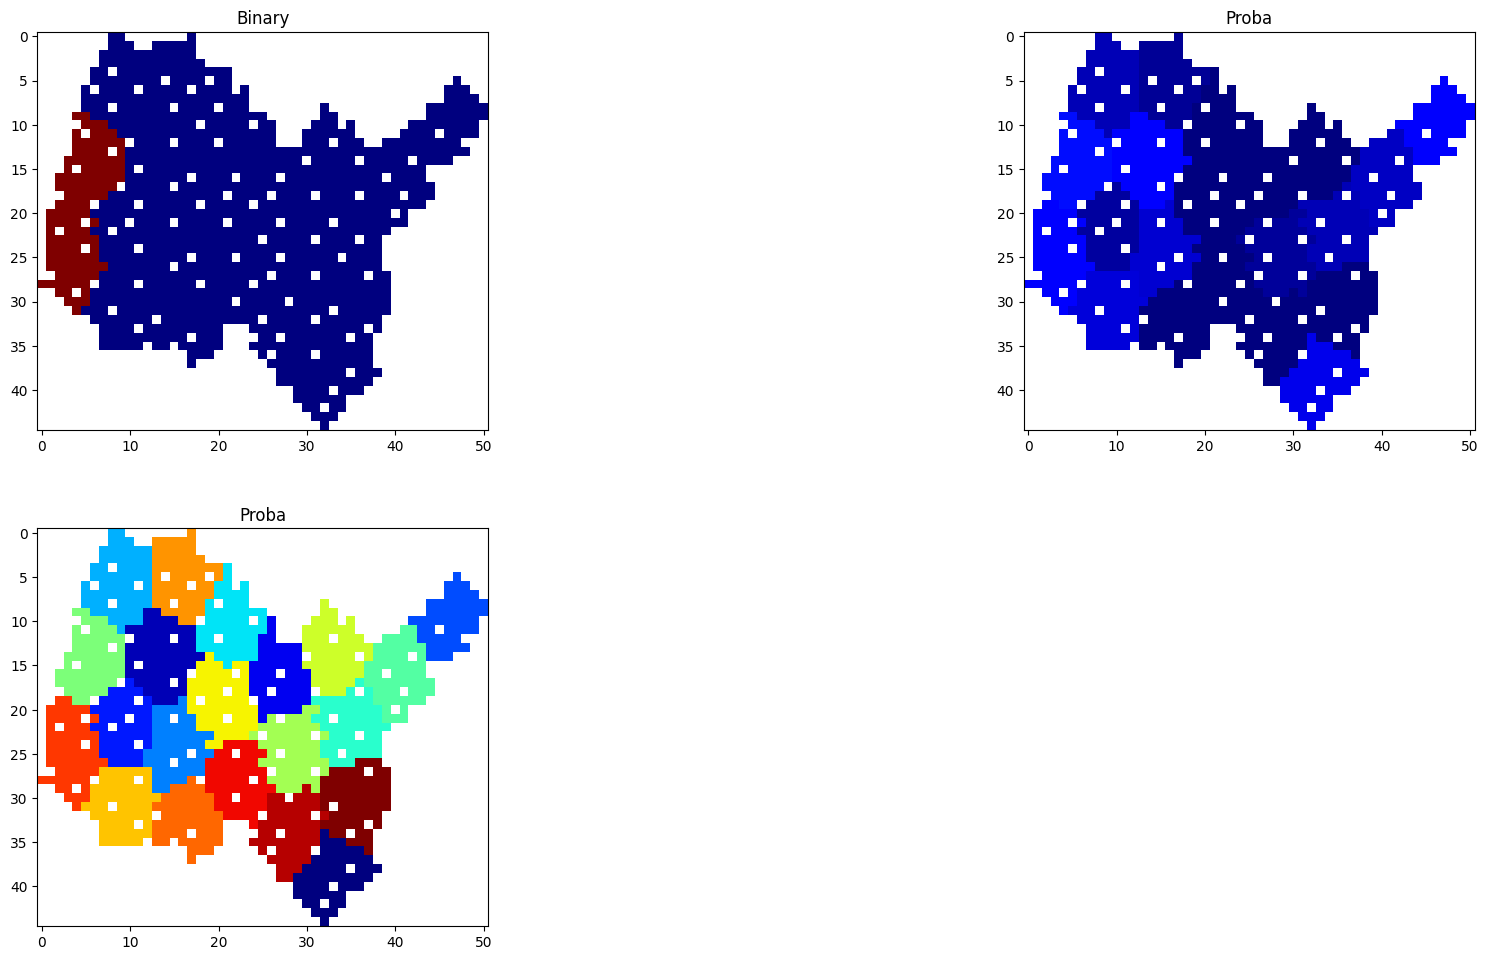

In [5]:
dir_dataset = Path('final/firepoint/2x2/train/')
departement = 'departement-01-ain'

name = departement+'binScale10'+'.pkl'
bin = pickle.load(open(dir_dataset / 'bin/' / name, 'rb'))
print(np.unique(bin))
name = departement+'rasterScale10'+'.pkl'
raster = pickle.load(open(dir_dataset / 'raster/' / name, 'rb'))

name = departement+'InfluenceScale10'+'.pkl'
proba10 = pickle.load(open(dir_dataset / 'influence' / name, 'rb'))

fig = plt.figure(figsize=(15,15))

temporalIndex = 1500
print(allDates[1500])
ax = fig.add_subplot(331)
ax.imshow(bin[:,:, temporalIndex], cmap='jet')
ax.set_title('Binary')  
ax = fig.add_subplot(333)
ax.imshow(proba10[:,:,temporalIndex], cmap='jet', vmin=0, vmax=np.nanmax(proba10))
ax.set_title('Proba')
ax = fig.add_subplot(334)
ax.imshow(raster, cmap='jet')
ax.set_title('Proba')
plt.tight_layout()

In [4]:
np.nanmin(proba10) < 0

False

In [25]:
Y = pickle.load(open('inference/firepoint/train/Y_full_10.pkl', 'rb'))
X = pickle.load(open('inference/firepoint/train/X_full_10.pkl', 'rb'))
graph = pickle.load(open('final/firepoint/train/graph_10.pkl', 'rb'))
mask = np.unique(np.argwhere(np.isnan(X[:,6:]))[:,0])
mask.shape
Y[(Y[:, 3] == 1) & (Y[:, 4] == 258) & (Y[:, -2] > 0)]

FileNotFoundError: [Errno 2] No such file or directory: 'inference/firepoint/train/Y_full_10.pkl'

In [8]:
from config import features
pos, _ = get_features_name_list(graph, 6, features)
pos

{'temp': 6,
 'dwpt': 10,
 'rhum': 14,
 'prcp': 18,
 'wdir': 22,
 'wspd': 26,
 'prec24h': 30,
 'dc': 34,
 'ffmc': 38,
 'dmc': 42,
 'nesterov': 46,
 'munger': 50,
 'kbdi': 54,
 'isi': 58,
 'angstroem': 62,
 'bui': 66,
 'fwi': 70,
 'dailySeverityRating': 74,
 'temp16': 78,
 'dwpt16': 82,
 'rhum16': 86,
 'prcp16': 90,
 'wdir16': 94,
 'wspd16': 98,
 'prec24h16': 102,
 'days_since_rain': 106,
 'sum_consecutive_rainfall': 110,
 'sum_last_7_days': 114,
 'elevation': 118,
 'highway': 122,
 'population': 126,
 'sentinel': 130,
 'landcover': 150,
 'foret': 154,
 'Calendar': 230,
 'Historical': 241,
 'Geo': 245,
 'air': 246}

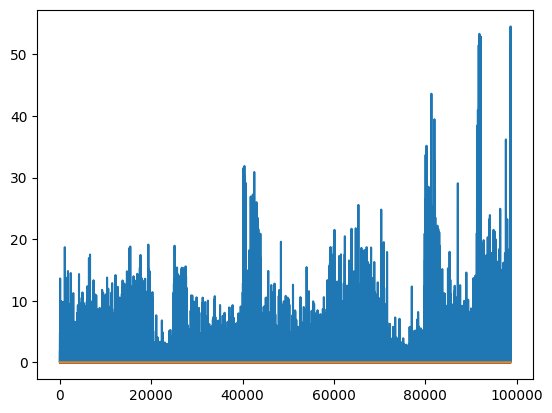

In [16]:
plt.plot(Y[:, -1])
plt.plot(X[:, pos['Historical']])

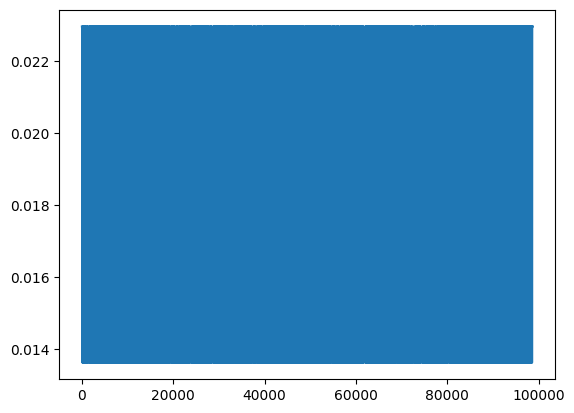

In [20]:
plt.plot(X[:, pos['Historical'] + 3])

In [ ]:
Y.shape

(26520, 8)

In [ ]:
ind = np.lexsort(([Y[:,-4]]))
order = Y[ind]

In [ ]:
plt.plot(order[:,-2])

NameError: name 'order' is not defined

In [ ]:
Y[:,-4], X[:,4]

(array([2022., 2023., 2024., ..., 2279., 2280., 2281.]),
 array([2022., 2023., 2024., ..., 2279., 2280., 2281.]))

In [ ]:
ind

array([    0,   260,   520, ..., 25999, 26259, 26519])

In [ ]:
np.argwhere

<function argwhere at 0x7f8bdc0d2370>

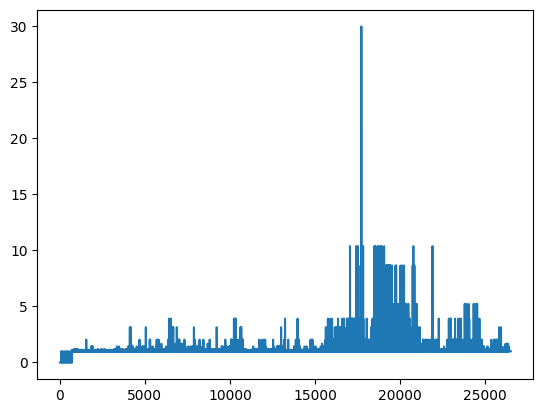

In [ ]:
plt.plot(order[:,-3])

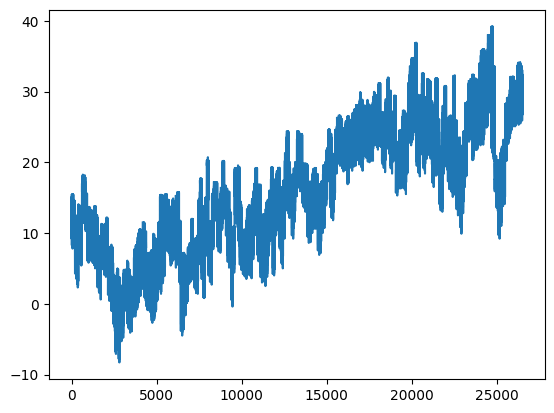

In [ ]:
plt.plot(X[ind,6])

In [ ]:
np.unique(raster)

array([  2.,   4.,   7.,   9.,  12.,  15.,  22.,  23.,  25.,  28.,  31.,
        32.,  35.,  44.,  46.,  47.,  49.,  55.,  56.,  61.,  62.,  63.,
        70.,  75.,  76.,  77.,  84.,  87.,  88.,  90.,  95.,  98.,  99.,
       101., 104., 106., 108., 111., 113.,  nan], dtype=float32)

In [ ]:
np.unique(YBin[:,-1])

array([0., 1.])

In [ ]:
np.unique(Y[:,0])

array([  0.,   1.,   2.,   3.,   4.,   5.,   7.,   8.,   9.,  10.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        39.,  40.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,
        52.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,
        64.,  65.,  67.,  70.,  71.,  72.,  73.,  75.,  76.,  77.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  98.,  99., 101., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118.])

In [ ]:
YBin[YBin[:,-1] > 0][:,4], YBin[YBin[:,-1] > 0][:,0], YBin[YBin[:,-1] > 0][:,3]

(array([2072., 2092., 2137., 2217., 2218., 2219., 2221., 2223., 2236.,
        2254., 2279., 2071., 2157., 2193., 2202., 2221., 2226., 2228.,
        2229., 2233., 2257., 2074., 2177., 2206., 2247., 2258., 2084.,
        2229., 2256., 2262., 2263., 2159., 2192., 2201., 2202., 2215.,
        2256., 2047., 2219., 2244., 2253., 2263., 2267., 2192., 2063.,
        2073., 2123., 2229., 2272., 2182., 2064., 2101., 2175., 2182.,
        2195., 2201., 2204., 2216., 2203., 2186., 2236., 2262., 2040.,
        2056., 2086., 2096., 2103., 2117., 2126., 2150., 2163., 2178.,
        2184., 2186., 2193., 2194., 2207., 2209., 2218., 2223., 2226.,
        2227., 2076., 2114., 2142., 2174., 2192., 2193., 2195., 2201.,
        2219., 2226., 2242., 2249., 2263., 2264., 2084., 2102., 2175.,
        2207., 2217., 2230., 2259., 2181., 2227., 2063., 2088., 2233.,
        2254., 2262., 2222., 2265., 2037., 2127., 2192., 2228., 2073.,
        2173., 2174., 2198., 2219., 2228., 2249., 2260., 2160., 2194.,
      

<Axes: >

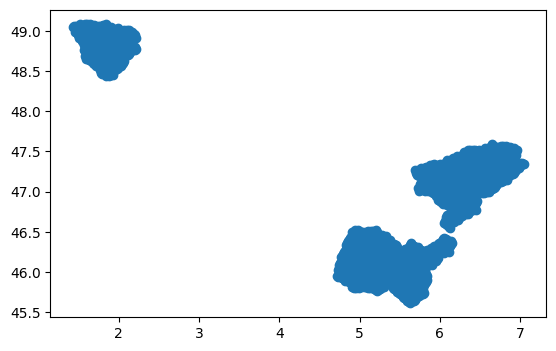

In [ ]:
test = pd.read_csv('test.csv')
testGeo = test[test['date'] == 2029]
testGeo = gpd.GeoDataFrame(testGeo, geometry=gpd.points_from_xy(testGeo.longitude, testGeo.latitude))
testGeo.plot()

In [ ]:
test

,date,latitude,longitude,scale5
0,2029,45.989310,4.850769,94
1,2029,46.055726,5.340705,57
2,2029,46.219423,4.905380,26
3,2029,45.719268,5.755522,118
4,2029,46.444826,4.929589,18
...,...,...,...,...
765573,2281,48.833885,1.752489,1
765574,2281,49.052720,1.616237,83
765575,2281,48.862643,1.976650,14
765576,2281,48.702993,1.763205,39


In [95]:
dir_dataset = Path('train')
departement = 'departement-01-ain'

name = departement+'binScale10'+'.pkl'
bin = pickle.load(open(dir_dataset / 'bin/2x2' / name, 'rb'))

name = departement+'rasterScale10'+'.pkl'
raster = pickle.load(open(dir_dataset / 'raster/2x2' / name, 'rb'))

name = departement+'influence'+'.pkl'
proba10 = pickle.load(open(dir_dataset / '../../log/' / name, 'rb'))

name = departement+'pastInfluence'+'.pkl'
proba10Past = pickle.load(open(dir_dataset / '../../log/' / name, 'rb'))

fig = plt.figure(figsize=(15,15))

temporalIndex = 1547

ax = fig.add_subplot(431)
ax.imshow(bin[:,:, temporalIndex], cmap='jet')
ax.set_title('Binary')
ax = fig.add_subplot(433)
ax.imshow(proba10[:,:,temporalIndex], cmap='jet', vmin=0, vmax=1)
ax.set_title('Proba')
ax = fig.add_subplot(434)
ax.imshow(raster == 6.0, cmap='jet')
ax = fig.add_subplot(435)
ax.imshow(proba10Past[:,:,temporalIndex], cmap='jet')
ax.set_title('Past')
plt.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: 'train/bin/2x2/departement-01-ainbinScale10.pkl'

In [ ]:
graph = read_object('graph_1.pkl', Path('train'))
graph._plot(graph.nodes)

FileNotFoundError: [Errno 2] No such file or directory: 'train/graph_1.pkl'

In [4]:
graph = read_object('graph_10.pkl', Path('exp_ks/firepoint/train'))

Y = pickle.load(open('exp_ks/firepoint/train/Y_full_10.pkl', 'rb'))
X = pickle.load(open('exp_ks/firepoint/train/X_full_10.pkl', 'rb'))

In [8]:
from config import features
features_name,_ = get_features_name_list(graph, 6, features)
features_name

{'temp': 6,
 'dwpt': 10,
 'rhum': 14,
 'prcp': 18,
 'wdir': 22,
 'wspd': 26,
 'prec24h': 30,
 'dc': 34,
 'ffmc': 38,
 'dmc': 42,
 'nesterov': 46,
 'munger': 50,
 'kbdi': 54,
 'isi': 58,
 'angstroem': 62,
 'bui': 66,
 'fwi': 70,
 'dailySeverityRating': 74,
 'temp16': 78,
 'dwpt16': 82,
 'rhum16': 86,
 'prcp16': 90,
 'wdir16': 94,
 'wspd16': 98,
 'prec24h16': 102,
 'elevation': 106,
 'highway': 110,
 'population': 114,
 'sentinel': 118,
 'landcover': 138,
 'foret': 142,
 'Calendar': 146,
 'Historical': 157,
 'Geo': 161,
 'air': 162}

In [15]:
np.unique(X[:, features_name.index('landcover') + 2])

array([0.009, 0.012, 0.017, 0.019, 0.036, 0.044])

In [ ]:
np.unique(X[:,features_name.index('foret') + 2])

array([0.097, 0.099, 0.114, 0.157, 0.185])

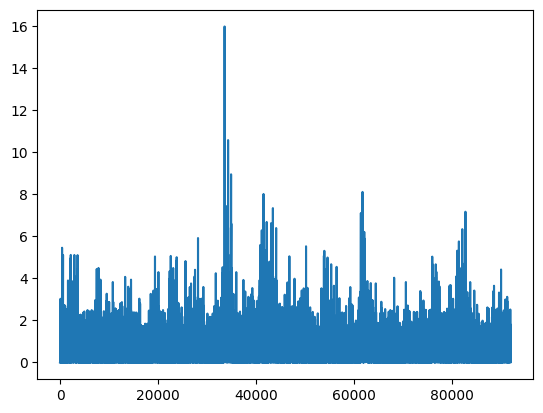

In [ ]:
plt.plot(Y[:,-1])

In [ ]:
from tools import *

features_name,_ = get_features_name_list(read_object('graph_5.pkl', Path('train/')), 6, features)

6 temp
10 dwpt
14 rhum
18 prcp
22 wdir
26 wspd
30 prec24h
34 dc
38 ffmc
42 dmc
46 nesterov
50 munger
54 kbdi
58 isi
62 angstroem
66 bui
70 fwi
74 daily_severity_rating
78 temp16
82 dwpt16
86 rhum16
90 prcp16
94 wdir16
98 wspd16
102 prec24h16
106 elevation
110 highway
114 population
118 sentinel
138 landcover
142 foret
146 Calendar
157 Historical
161 Geo
162 air


In [ ]:
np.unique(X[:,features_name.index('foret')])

array([0.072, 0.074, 0.077, 0.078, 0.079, 0.08 , 0.082, 0.084, 0.086,
       0.088, 0.089, 0.091, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  ])

In [ ]:
np.unique(X[:,features_name.index('landcover')])

array([0.015, 0.024, 0.028, 0.03 , 0.033, 0.036, 0.038, 0.039, 0.04 ,
       0.041, 0.042, 0.043, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05 ,
       0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059,
       0.06 , 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068,
       0.069, 0.07 , 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077,
       0.078, 0.079, 0.08 , 0.081, 0.082, 0.083, 0.084, 0.085, 0.086,
       0.087, 0.088, 0.089, 0.09 , 0.091, 0.092, 0.093, 0.094, 0.095,
       0.096, 0.097, 0.098, 0.099, 0.1  , 0.101, 0.102, 0.103, 0.104,
       0.105, 0.106, 0.107, 0.108, 0.109, 0.11 , 0.111, 0.112, 0.113,
       0.114, 0.115, 0.116, 0.117, 0.118, 0.119, 0.12 , 0.121, 0.122,
       0.123, 0.124, 0.125, 0.126, 0.127, 0.128, 0.129, 0.13 , 0.131,
       0.132, 0.133, 0.134, 0.135, 0.136, 0.137, 0.138, 0.139, 0.14 ,
       0.141, 0.142, 0.143, 0.144, 0.145, 0.146, 0.147, 0.148, 0.149,
       0.15 , 0.151, 0.152, 0.153, 0.154, 0.155, 0.156, 0.157, 0.158,
       0.159, 0.16 ,

In [ ]:
X[:,108].min(), X[:,108].max()

(46.29600143432617, 1353.8330078125)

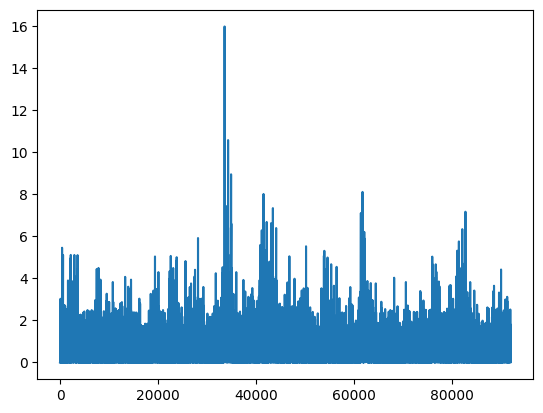

In [ ]:
plt.plot(Y[:,-1])

In [ ]:
np.mean(Y[:,-2])

0.07159385965865264

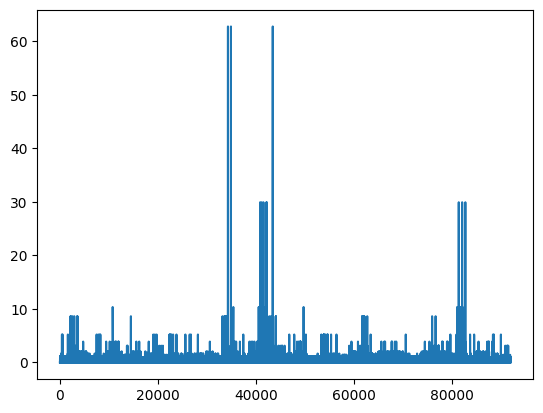

In [ ]:
plt.plot(Y[:,-3])

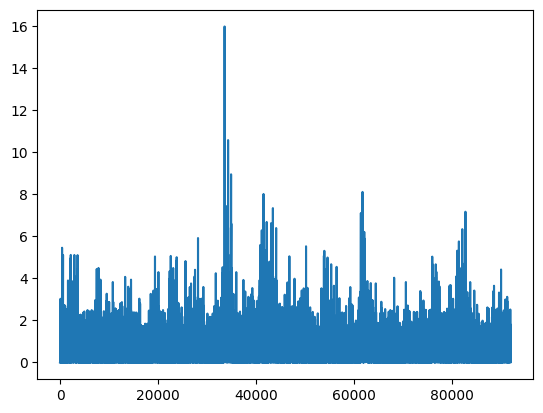

In [ ]:
plt.plot(Y[:,-1])


In [34]:
Y = pickle.load(open('final/firepoint/1x1/train/Y_full_10.pkl', 'rb'))
X = pickle.load(open('train/X_100_7_10.pkl', 'rb'))
np.unique(np.argwhere(np.isnan(X[:,6:]))).shape

FileNotFoundError: [Errno 2] No such file or directory: 'train/X_100_7_10.pkl'

In [ ]:
get_features_name_list(graph, 6, features)

6 temp
10 dwpt
14 rhum
18 prcp
22 wdir
26 wspd
30 prec24h
34 dc
38 ffmc
42 dmc
46 nesterov
50 munger
54 kbdi
58 isi
62 angstroem
66 bui
70 fwi
74 daily_severity_rating
78 temp16
82 dwpt16
86 rhum16
90 prcp16
94 wdir16
98 wspd16
102 prec24h16
106 elevation
110 highway
114 population
118 sentinel
138 landcover
142 foret
146 Calendar
157 Historical
161 Geo
162 air


({'temp': 6,
  'dwpt': 10,
  'rhum': 14,
  'prcp': 18,
  'wdir': 22,
  'wspd': 26,
  'prec24h': 30,
  'dc': 34,
  'ffmc': 38,
  'dmc': 42,
  'nesterov': 46,
  'munger': 50,
  'kbdi': 54,
  'isi': 58,
  'angstroem': 62,
  'bui': 66,
  'fwi': 70,
  'daily_severity_rating': 74,
  'temp16': 78,
  'dwpt16': 82,
  'rhum16': 86,
  'prcp16': 90,
  'wdir16': 94,
  'wspd16': 98,
  'prec24h16': 102,
  'elevation': 106,
  'highway': 110,
  'population': 114,
  'sentinel': 118,
  'landcover': 138,
  'foret': 142,
  'Calendar': 146,
  'Historical': 157,
  'Geo': 161,
  'air': 162},
 166)

In [ ]:
X, Y = remove_nan_nodes(X, Y)
X.shape

(84085, 166)

In [ ]:
Y.shape, X.shape

((157409, 8), (157409, 162))

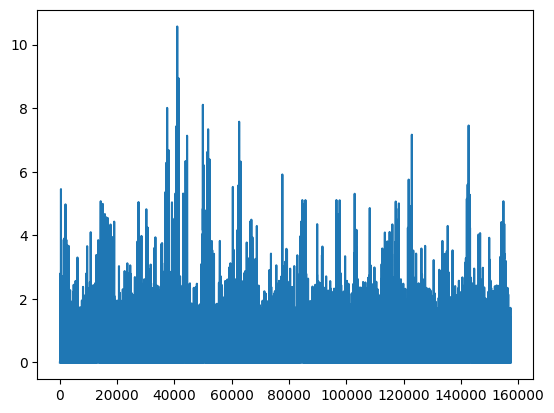

In [ ]:
plt.plot(Y[:,-1])

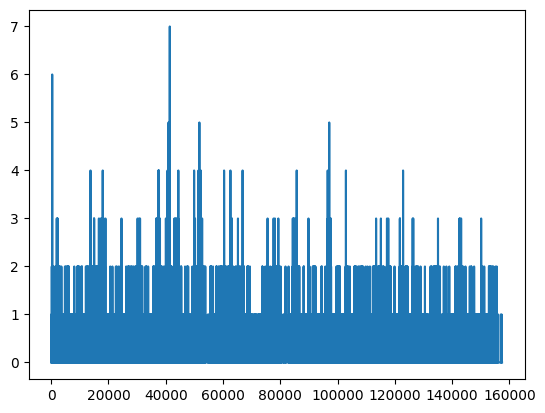

In [ ]:
plt.plot(Y[:,-2])

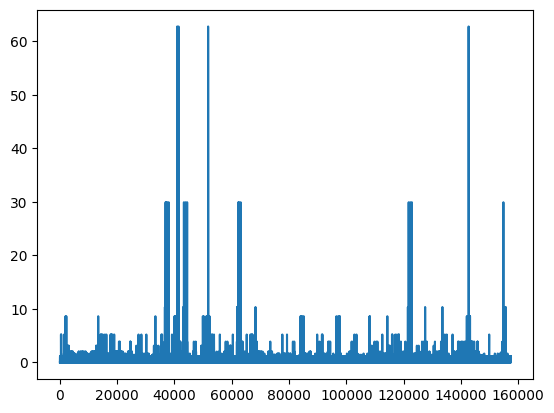

In [ ]:
plt.plot(Y[:,-3])

In [ ]:
ind = np.lexsort([Y[:,4]])
order = Y[ind]
X = X[ind]

In [ ]:
order.shape

(157409, 8)

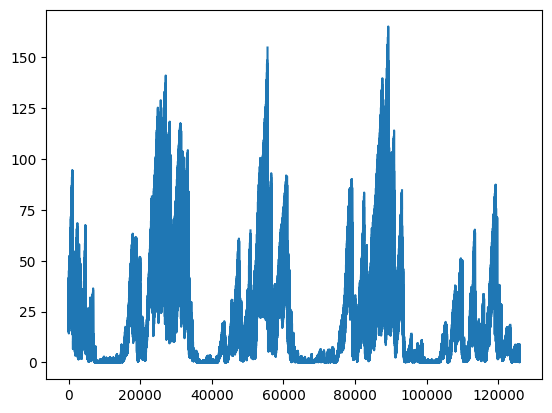

In [ ]:
plt.plot(X[:int(X.shape[0] * 0.8),42])

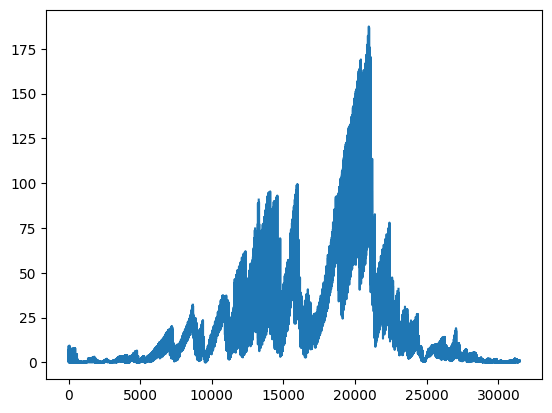

In [ ]:
plt.plot(X[int(X.shape[0] * 0.8):,42])

(array([1.56567249e+00, 1.92491749e-01, 4.91568051e-02, 4.88923273e-02,
        1.95112484e-02, 7.66985611e-03, 4.07536242e-03, 2.04369207e-03,
        1.10599806e-03, 7.69389955e-04, 3.00542951e-04, 2.04369207e-04,
        1.32238898e-04, 1.08195462e-04, 6.01085902e-05, 3.60651541e-05,
        1.20217180e-05, 1.20217180e-05, 3.60651541e-05, 3.60651541e-05]),
 array([ 0.     ,  0.52845,  1.0569 ,  1.58535,  2.1138 ,  2.64225,
         3.1707 ,  3.69915,  4.2276 ,  4.75605,  5.2845 ,  5.81295,
         6.3414 ,  6.86985,  7.3983 ,  7.92675,  8.4552 ,  8.98365,
         9.5121 , 10.04055, 10.569  ]),
 <BarContainer object of 20 artists>)

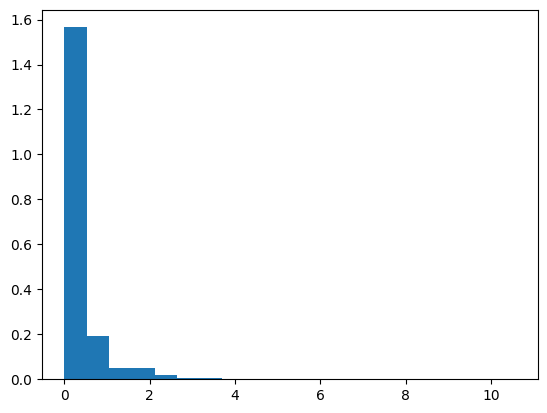

In [ ]:
plt.hist(Y[:,-1], density=True, bins=20)

(array([1.46249e+05, 8.15600e+03, 2.26100e+03, 5.09000e+02, 1.56000e+02,
        4.20000e+01, 2.00000e+01, 8.00000e+00, 2.00000e+00, 6.00000e+00]),
 array([ 0.    ,  1.0569,  2.1138,  3.1707,  4.2276,  5.2845,  6.3414,
         7.3983,  8.4552,  9.5121, 10.569 ]),
 <BarContainer object of 10 artists>)

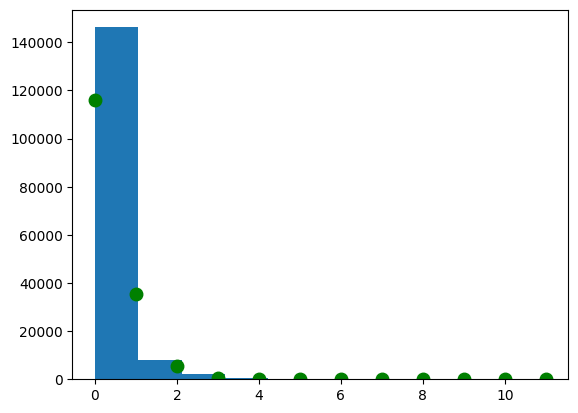

In [ ]:
import scipy

k = np.arange(np.max(Y[:,-1])+1)
plt.plot(k, scipy.stats.poisson.pmf(k, np.mean(Y[:,-1]))*len(Y[:,-1]), 'go', markersize=9)
plt.hist(Y[:,-1], bins=np.max(np.unique(Y[:,-1].astype(int))))

In [84]:
firepoint = pd.read_csv('/home/caron/Bureau/csv/departement-78-yvelines/firepoint/NATURELSfire.csv')
X = list(zip(firepoint.longitude, firepoint.latitude))
firepoint['scale'] = graph._predict_node(X)
firepoint['label'] = 1
len(firepoint)
firepoint = firepoint.groupby(by=['date', 'scale'])['label'].sum().reset_index()
len(firepoint)
firepoint = firepoint[firepoint['date'].isin(allDates)]
firepoint['date'] = [allDates.index(date) for date in firepoint.date if date in allDates]
y = firepoint.label
x = firepoint.date

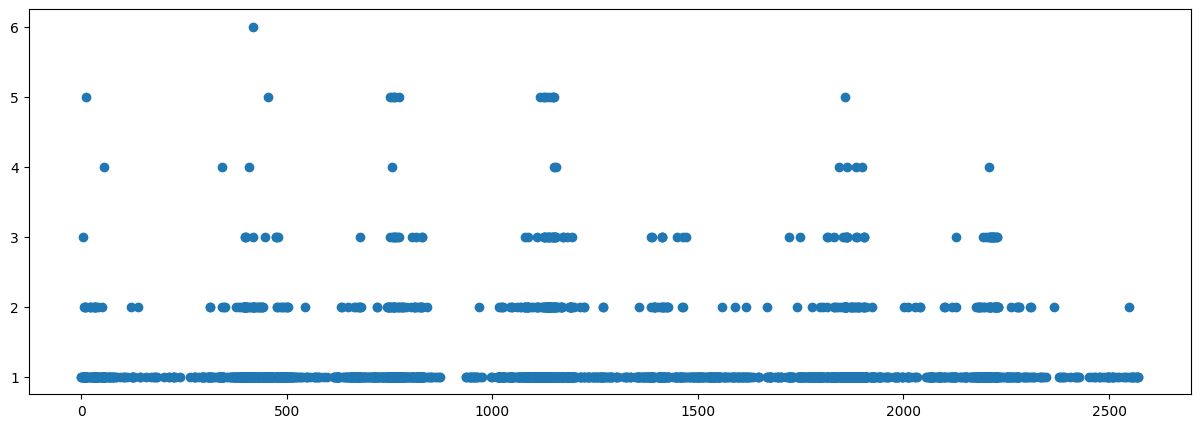

In [91]:
plt.figure(figsize=(15,5))
#plt.scatter(orderBin[Y[:,3] == 25][:,4], order[order[:,3] == 25][:,-2])
#plt.scatter(orderBin[order[:,3] == 25][:,4], order[order[:,3] == 25][:,-1])
plt.scatter(order[(order[:,3] == 78) & (order[:, -2] > 0)][:,4], order[(order[:,3] == 78) & (order[:, -2] > 0)][:,-2])
#plt.scatter(x, y, c='red')

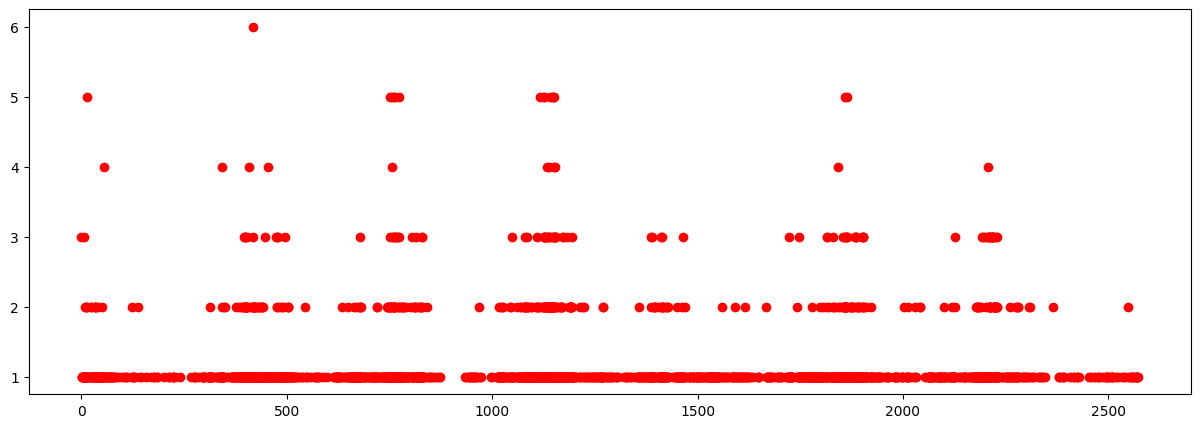

In [93]:
plt.figure(figsize=(15,5))
plt.scatter(x, y, c='red')

In [90]:
nomatch = np.argwhere(y != order[(order[:,3] == 78) & (order[:, -2] > 0)][:, -2])[:, 0]
plt.scatter(x[nomatch], y[nomatch])

ValueError: ('Lengths must match to compare', (2255,), (2240,))

In [94]:
forder = order[(order[:,3] == 78) & (order[:, -2] > 0)]
forder.shape

(2240, 8)

In [77]:
np.sum(y), order[order[:,3] == 78][:,-2].sum()

(2761.0, 2823.0)

In [ ]:
reg = gpd.read_file('regions.geojson')
reg

,geometry


In [ ]:
strange = fdate[~np.isin(fdate, x.values)]
strange

array([], dtype=float64)

In [6]:
features_name, _ = get_features_name_list(graph, 6, features)

6 temp
10 dwpt
14 rhum
18 prcp
22 wdir
26 wspd
30 prec24h
34 dc
38 ffmc
42 dmc
46 nesterov
50 munger
54 kbdi
58 isi
62 angstroem
66 bui
70 fwi
74 daily_severity_rating
78 temp16
82 dwpt16
86 rhum16
90 prcp16
94 wdir16
98 wspd16
102 prec24h16
106 elevation
110 highway
114 population
118 sentinel
138 landcover
142 foret
146 Calendar
157 Historical
161 Geo
162 air


In [7]:
features_name

{'temp': 6,
 'dwpt': 10,
 'rhum': 14,
 'prcp': 18,
 'wdir': 22,
 'wspd': 26,
 'prec24h': 30,
 'dc': 34,
 'ffmc': 38,
 'dmc': 42,
 'nesterov': 46,
 'munger': 50,
 'kbdi': 54,
 'isi': 58,
 'angstroem': 62,
 'bui': 66,
 'fwi': 70,
 'daily_severity_rating': 74,
 'temp16': 78,
 'dwpt16': 82,
 'rhum16': 86,
 'prcp16': 90,
 'wdir16': 94,
 'wspd16': 98,
 'prec24h16': 102,
 'elevation': 106,
 'highway': 110,
 'population': 114,
 'sentinel': 118,
 'landcover': 138,
 'foret': 142,
 'Calendar': 146,
 'Historical': 157,
 'Geo': 161,
 'air': 162}

In [8]:
keys = list(features_name.keys())

In [10]:
methods = ['min', 'mean', 'max', 'std']

In [26]:
cems_variables = ['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'prec24h',
                'dc', 'ffmc', 'dmc', 'nesterov', 'munger', 'kbdi',
                'isi', 'angstroem', 'bui', 'fwi', 'daily_severity_rating',
                'temp16', 'dwpt16', 'rhum16', 'prcp16', 'wdir16', 'wspd16', 'prec24h16']

sentinel_variables = ['NDVI', 'NDMI', 'NDBI', 'NDSI', 'NDWI']
landcover_variables = ['landcover']
foret_variables = ['foret']
osmnx_variables = ['highway']
elevation_variables = ['elevation']
population_variabes = ['population']
calendar_variables = ['month', 'dayofweek', 'dayofyear', 'isweekend', 'couvrefeux', 'confinemenent',
                    'ramadan', 'bankHolidays', 'bankHolidaysEve', 'holidays', 'holidaysBorder']
geo_variables = ['departement']
historical_variables = ['influence']
air_variables = ['O3', 'NO2', 'PM10', 'PM25']

In [44]:
fet = [[157,   9],
       [159,   9],
       [ 43,   7],
       [158,   7],
       [ 44,   7],
       [ 42,   7],
       [ 67,   6],
       [ 54,   6],
       [ 55,   6],
       [ 46,   6],
       [ 68,   6],
       [ 47,   6],
       [ 66,   6],
       [160,   6],
       [ 56,   6],
       [ 48,   6],
       [ 94,   5],
       [138,   5],
       [ 34,   5],
       [ 45,   5],
       [135,   5],
       [ 60,   5],
       [ 62,   5],
       [141,   5],
       [165,   5],
       [ 35,   5],
       [114,   5],
       [ 39,   5],
       [ 37,   5],
       [ 52,   5],
       [ 96,   5],
       [ 69,   5],
       [115,   5],
       [ 71,   5],
       [ 88,   5],
       [ 50,   5],
       [133,   5],
       [ 40,   5],
       [163,   5],
       [ 57,   5],
       [ 72,   5],
       [ 59,   5],
       [ 36,   5],
       [ 38,   5],
       [ 49,   5],
       [146,   4],
       [ 95,   4],
       [106,   4],
       [108,   4],
       [ 85,   4],
       [140,   4],
       [ 87,   4],
       [ 51,   4],
       [ 53,   4],
       [ 64,   4],
       [147,   4],
       [136,   4],
       [134,   4],
       [  7,   4],
       [117,   4],
       [139,   4],
       [ 22,   4],
       [130,   4],
       [ 24,   4],
       [ 41,   4],
       [107,   4],
       [162,   4],
       [122,   4],
       [109,   4],
       [120,   4],
       [ 14,   4],
       [ 58,   4],
       [ 16,   4],
       [137,   4],
       [ 86,   4],
       [116,   4],
       [ 76,   4],
       [118,   3],
       [ 32,   3],
       [124,   3],
       [ 97,   3],
       [ 75,   3],
       [103,   3],
       [ 79,   3],
       [ 65,   3],
       [144,   3],
       [161,   3],
       [110,   3],
       [112,   3],
       [123,   3],
       [ 10,   3],
       [ 63,   3],
       [ 12,   3],
       [102,   3],
       [ 23,   3],
       [ 78,   3],
       [119,   3],
       [ 84,   3],
       [121,   3],
       [132,   3]]


for fe in fet:
    f = fe[0]
    for i, key in enumerate(keys):
        res = features_name.index(keys[i)]
        try:
            next = features_name.index(keys[i + 1)]
        except Exception as e:
                next =  None
        if next != None:
            if f >= res and f < next:
                if keys[i] in cems_variables or keys[i] == 'elevation' or \
                keys[i] == 'population' or keys[i] == 'highway' or keys[i] == 'foret' or keys[i] == 'Historical':
                    print(keys[i], fe[1], methods[f-res])
                if keys[i] == 'sentinel':
                    for i, v in enumerate(sentinel_variables):
                        if f >= (i * 4) + res and (i + 1) * 4 + res > f:
                            meth_index = f - ((i * 4) + res)
                            print(v, fe[1], methods[meth_index])

                elif keys[i] == 'Calendar':
                    print(keys[i], fe[1], calendar_variables[f-res])
        else:
            if f >= res:
                print(keys[i], fe[1], air_variables[f-res])

Historical 9 min
Historical 9 max
dmc 7 mean
Historical 7 mean
dmc 7 max
dmc 7 min
bui 6 mean
kbdi 6 min
kbdi 6 mean
nesterov 6 min
bui 6 max
nesterov 6 mean
bui 6 min
Historical 6 std
kbdi 6 max
nesterov 6 max
wdir16 5 min
dc 5 min
dmc 5 std
NDWI 5 mean
isi 5 max
angstroem 5 min
air 5 PM25
dc 5 mean
population 5 min
ffmc 5 mean
dc 5 std
munger 5 max
wdir16 5 max
bui 5 std
population 5 mean
fwi 5 mean
rhum16 5 max
munger 5 min
NDSI 5 std
ffmc 5 max
air 5 NO2
kbdi 5 std
fwi 5 max
isi 5 mean
dc 5 max
ffmc 5 min
nesterov 5 std
Calendar 4 month
wdir16 4 mean
elevation 4 min
elevation 4 max
dwpt16 4 std
rhum16 4 mean
munger 4 mean
munger 4 std
angstroem 4 max
Calendar 4 dayofweek
NDWI 4 max
NDWI 4 min
temp 4 mean
population 4 std
wdir 4 min
NDSI 4 min
wdir 4 max
ffmc 4 std
elevation 4 mean
air 4 O3
NDMI 4 min
elevation 4 std
NDVI 4 max
rhum 4 min
isi 4 min
rhum 4 max
NDWI 4 std
rhum16 4 min
population 4 max
daily_severity_rating 4 max
NDVI 3 min
prec24h 3 max
NDMI 3 max
wdir16 3 std
daily_s

In [37]:
graph = pickle.load(open('train/graph_10.pkl', 'rb'))

Y = pickle.load(open('train/Y_100_7_10.pkl', 'rb'))
X = pickle.load(open('train/X_100_7_10.pkl', 'rb'))
np.unique(np.argwhere(np.isnan(X[:,6:]))).shape

(7082,)

In [ ]:
for var in features:
    print(var)
    plt.scatter(X[:,features_name.index(var)], Y[:,-1])
    plt.ylabel('label')
    plt.xlabel(var)
    plt.title(var)
    plt.savefig('varOnValue/'+var+'.png')
    plt.close('all')

temp
dwpt
rhum
prcp
wdir
wspd
prec24h
dc
ffmc
dmc
nesterov
munger
kbdi
isi
angstroem
bui
fwi
daily_severity_rating
temp16
dwpt16
rhum16
prcp16
wdir16
wspd16
prec24h16
elevation
highway
population
sentinel
landcover
foret
Calendar
Historical
Geo
air


In [ ]:
allDates.index('2023-01-01') / 5

405.8

In [38]:
from features_selection import *

X, Y = remove_nan_nodes(X, Y)

variables = []
df = pd.DataFrame(index=np.arange(X.shape[0]))
for i in range(X.shape[1]):
    if i >= 6:
        variables.append(i)
        df[i] = X[:,i]

df['target'] = Y[:,-1]

features_importance = get_features(df, variables, target='target', num_feats=100)

In [39]:
features_importance = get_features(df, variables, target='target', num_feats=100)

=> Recherche des features pertinentes
   - Grande variance
   - Coefficient de corrélation de Pearson
   - Coefficient de corrélation de Kendall
   - Coefficient de corrélation de Spearman
   - Random forests
   - Régression linéaire
[  0  15  56  59 105 107 112 114 115 116 120 124 127 128 129 131 132 133
 134 135 138 139 140 143 144 146 149 151 152 153 154 155]
   - Extra trees
   - XGBoost
   - LightGBM
   - Lasso
Fitting estimator with 160 features.


In [40]:
features_importance = np.asarray(features_importance)
features_importance

array([[157,   9],
       [159,   9],
       [ 43,   7],
       [158,   7],
       [ 44,   7],
       [ 42,   7],
       [ 67,   6],
       [ 54,   6],
       [ 55,   6],
       [ 46,   6],
       [ 68,   6],
       [ 47,   6],
       [ 66,   6],
       [160,   6],
       [ 56,   6],
       [ 48,   6],
       [ 94,   5],
       [138,   5],
       [ 34,   5],
       [ 45,   5],
       [135,   5],
       [ 60,   5],
       [ 62,   5],
       [141,   5],
       [165,   5],
       [ 35,   5],
       [114,   5],
       [ 39,   5],
       [ 37,   5],
       [ 52,   5],
       [ 96,   5],
       [ 69,   5],
       [115,   5],
       [ 71,   5],
       [ 88,   5],
       [ 50,   5],
       [133,   5],
       [ 40,   5],
       [163,   5],
       [ 57,   5],
       [ 72,   5],
       [ 59,   5],
       [ 36,   5],
       [ 38,   5],
       [ 49,   5],
       [146,   4],
       [ 95,   4],
       [106,   4],
       [108,   4],
       [ 85,   4],
       [140,   4],
       [ 87,   4],
       [ 51,

In [42]:
np.unique(features_importance[:,0])

array([  7,  10,  12,  14,  16,  22,  23,  24,  32,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  62,  63,  64,
        65,  66,  67,  68,  69,  71,  72,  75,  76,  78,  79,  84,  85,
        86,  87,  88,  94,  95,  96,  97, 102, 103, 106, 107, 108, 109,
       110, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 144, 146,
       147, 157, 158, 159, 160, 161, 162, 163, 165])

In [ ]:
np.unique(features_importance[:,0])

array([  7,  10,  13,  14,  16,  22,  23,  24,  25,  28,  32,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  52,  53,  54,  55,  56,  57,  58,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  74,  75,  76,  77,  78,  79,
        80,  82,  86,  87,  88,  94,  96,  97,  99, 106, 107, 108, 109,
       110, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 145, 146,
       147, 148, 157, 158, 159, 160, 162, 163, 165])

In [ ]:
features_name

{'temp': 6,
 'dwpt': 10,
 'rhum': 14,
 'prcp': 18,
 'wdir': 22,
 'wspd': 26,
 'prec24h': 30,
 'dc': 34,
 'ffmc': 38,
 'dmc': 42,
 'nesterov': 46,
 'munger': 50,
 'kbdi': 54,
 'isi': 58,
 'angstroem': 62,
 'bui': 66,
 'fwi': 70,
 'daily_severity_rating': 74,
 'temp16': 78,
 'dwpt16': 82,
 'rhum16': 86,
 'prcp16': 90,
 'wdir16': 94,
 'wspd16': 98,
 'prec24h16': 102,
 'elevation': 106,
 'highway': 110,
 'population': 114,
 'sentinel': 118,
 'landcover': 138,
 'Calendar': 147,
 'Historical': 158}

In [ ]:
np.sum(YBin[:,-1])

1970.0

In [ ]:
YBin[YBin[:,-1] > 0][:,4], YBin[YBin[:,-1] > 0][:,0], YBin[YBin[:,-1] > 0][:,3]

(array([1564., 1564., 1546., ...,  307.,  736., 1867.]),
 array([78., 65.,  6., ..., 65.,  9.,  9.]),
 array([1., 1., 1., ..., 1., 1., 1.]))

In [ ]:
firepoint[firepoint['date'] == 2074]

,date_debut,date_fin,1er engin SLL,raison_sortie,date,geometry,latitude,longitude,IN,type,coef,label,altitude,h3,scale
2768,2023-02-15 17:06:24,2023-02-15 17:38:51,2023-02-15 17:16:21,NATURELS,2074,POINT (6.052971523002236 47.24917343655492),47.249173,6.052972,True,NATURELS,1,1,0.0,871f828aaffffff,23


In [ ]:
allDates[temporalIndex]

'2023-03-13'

In [ ]:
allDates.index('2023-01-01')

2029

In [ ]:
np.nansum(bin[:,:, 1010] >  0), np.nanmax(bin[:,:, 2029:]), np.nanmin(bin[:,:, 2029:]), np.nanstd(bin[:,:, 2029:])

(4, 2.0, 0.0, 0.028554290758831088)

In [ ]:
proba10Past[raster == 0, 856]

array([ 2.04796964e-17,  2.45788944e-17,  3.22548681e-17,  4.16948884e-17,
        6.05749707e-18,  3.86229960e-17,  3.43771194e-17,  2.27812935e-17,
        1.37965494e-02, -5.67756210e-18,  2.10801786e-17,  6.74128280e-17,
        5.66986264e-17,  5.50982229e-17,  1.43123083e-02,  3.97416285e-17,
        8.02034874e-17,  6.32799493e-17,  7.14692910e-17,  1.50138920e-02,
        7.68593678e-17,  6.87979485e-17,  7.12450784e-17,  6.13157433e-17,
        4.50265909e-17,  1.74024658e-02,  6.37854715e-17,  5.45776444e-17,
        5.34601168e-17])

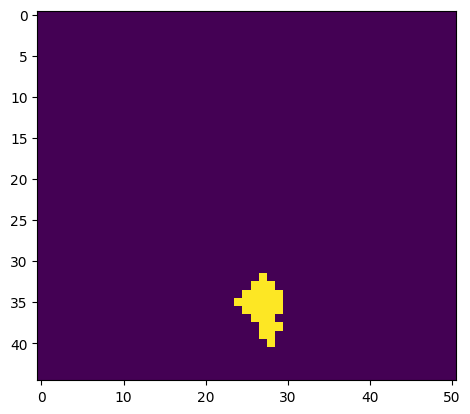

In [ ]:
plt.imshow(raster == 0)

In [ ]:
np.unique(bin)

array([ 30.,  47.,  60.,  67.,  86.,  87.,  89.,  90., 105., 115., 119.,
       134., 150., 152., 156., 161., 165., 181., 201., 214., 240., 244.,
        nan])

In [ ]:
geo = gpd.read_file(dir_dataset / '../scales' / 'regions.geojson')
graphScale = GraphStructure(1, geo, 500.0, 6, True)
graphScale._train_kmeans()

TypeError: __init__() takes 5 positional arguments but 6 were given

In [ ]:
graph = pickle.load(open('test/2023/graph_5.pkl', 'rb'))
graph._plot(graph.nodes)

In [ ]:
firepoint = pd.read_csv('/home/caron/Bureau/csv/departement-25-doubs/firepoint/NATURELSfire.csv')
X = list(zip(firepoint.longitude, firepoint.latitude))
firepoint['scale'] = graph._predict_node(X)
len(firepoint)
firepoint = firepoint.drop_duplicates(subset=('scale', 'date'))
len(firepoint)

2743

2746

In [ ]:
firepoint[firepoint['date'] >= '2023-01-01']

,date_debut,date_fin,1er engin SLL,raison_sortie,date,geometry,latitude,longitude,IN,type,coef,label,altitude,h3,scale
2764,2023-01-01 18:22:27,2023-01-01 19:15:29,2023-01-01 18:36:28,NATURELS,2023-01-01,POINT (6.379721630606588 47.04856308248432),47.048563,6.379722,True,NATURELS,1,1,0.0,871f82076ffffff,113
2765,2023-01-10 18:09:48,2023-01-10 19:51:29,-,NATURELS,2023-01-10,POINT (6.252583644154578 47.30947220067402),47.309472,6.252584,True,NATURELS,1,1,260.0,871f828e1ffffff,90
2766,2023-02-09 18:13:13,2023-02-09 19:34:54,2023-02-09 18:26:13,NATURELS,2023-02-09,POINT (6.882795615283376 47.42495144013152),47.424951,6.882796,True,NATURELS,1,1,0.0,871f82b4bffffff,111
2767,2023-02-13 17:38:28,2023-02-13 19:30:55,2023-02-13 17:59:03,NATURELS,2023-02-13,POINT (6.80571257239119 47.34940666527785),47.349407,6.805713,True,NATURELS,1,1,0.0,871f82a70ffffff,63
2768,2023-02-15 17:06:24,2023-02-15 17:38:51,2023-02-15 17:16:21,NATURELS,2023-02-15,POINT (6.052971523002236 47.24917343655492),47.249173,6.052972,True,NATURELS,1,1,0.0,871f828aaffffff,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,2023-09-02 15:19:34,2023-09-02 17:29:32,2023-09-02 15:35:53,NATURELS,2023-09-02,POINT (6.088833947084734 47.341352484097094),47.341352,6.088834,True,NATURELS,1,1,250.0,871f82811ffffff,44
2976,2023-09-03 16:35:27,2023-09-03 19:04:39,2023-09-03 16:53:17,NATURELS,2023-09-03,POINT (5.944799495046834 47.33662666633025),47.336627,5.944799,True,NATURELS,1,1,230.0,871f8298effffff,70
2977,2023-10-04 16:13:00,2023-10-04 18:16:00,2023-10-04 16:26:00,NATURELS,2023-10-04,POINT (6.232051108348069 47.317623262716246),47.317623,6.232051,True,NATURELS,1,1,350.0,871f828e1ffffff,23
2978,2023-10-04 15:15:00,2023-10-04 16:09:00,2023-10-04 15:25:00,NATURELS,2023-10-04,POINT (6.584806130357235 47.44321597878608),47.443216,6.584806,True,NATURELS,1,1,0.0,871f82b01ffffff,7


In [ ]:
X[X[:,3] == 78].shape

TypeError: list indices must be integers or slices, not tuple

In [ ]:
train_loader = read_object('train_loader_'+str(True)+'.pkl', Path('train'))
val_loader = read_object('val_loader_'+str(True)+'.pkl', Path('train'))

In [ ]:
for i, data in enumerate(train_loader):
    print(i)
    inputs, labels, indices, edges = data
    print(edges.shape)

0
torch.Size([0])


In [ ]:
print(inputs.shape)

torch.Size([0, 144])


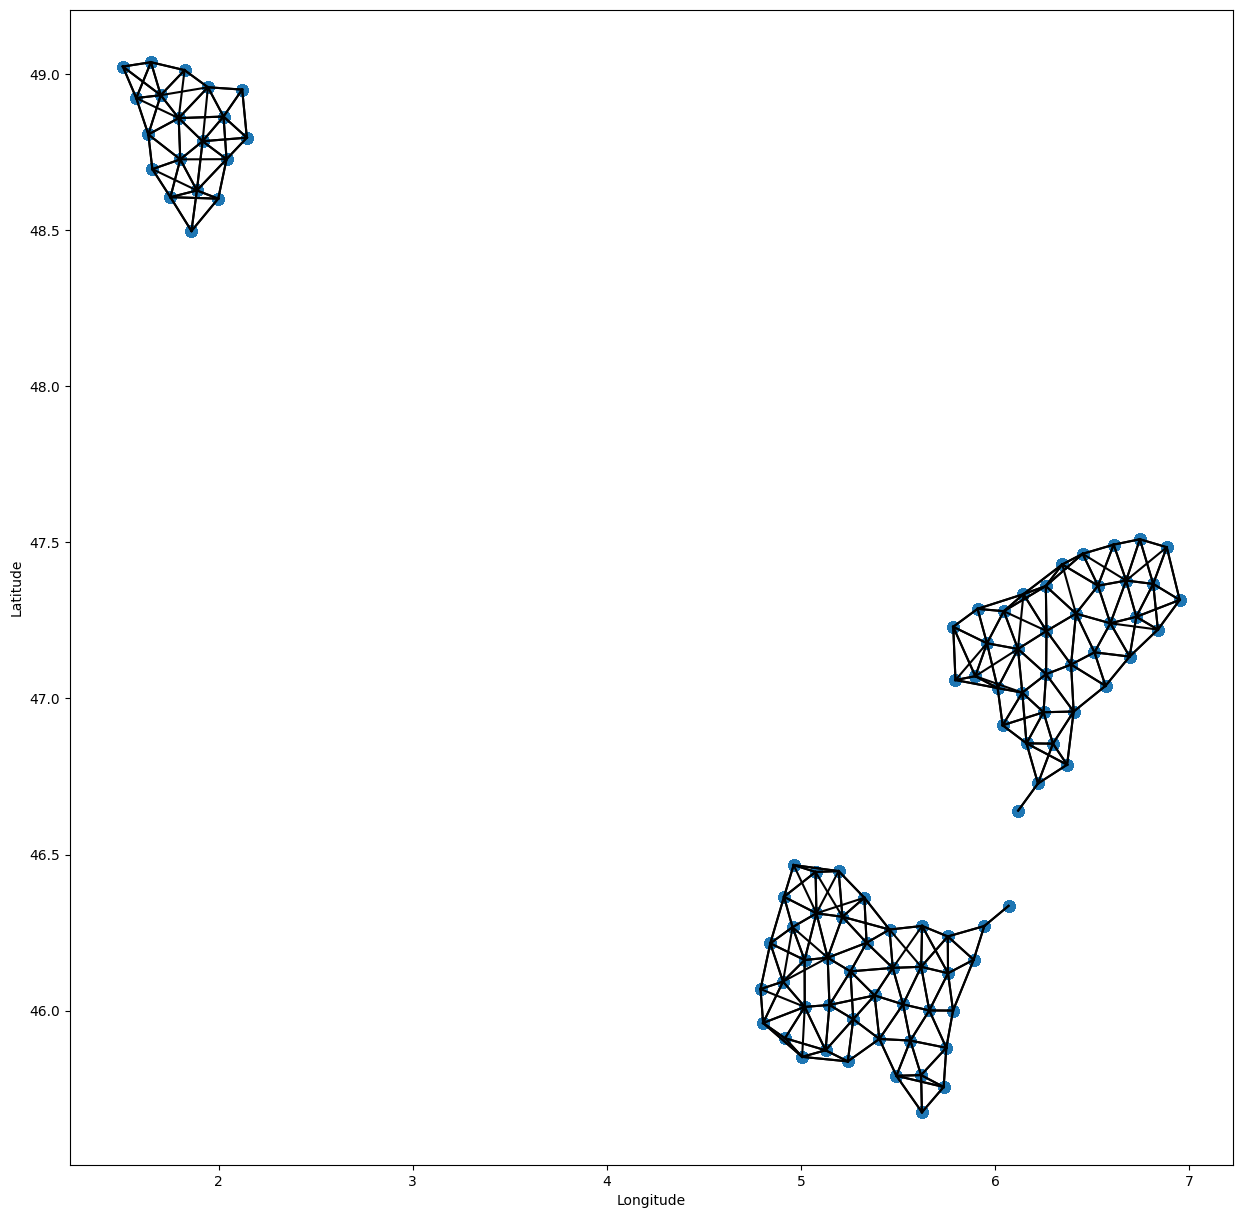

In [ ]:
graph = pickle.load(open('train/graph_5.pkl', 'rb'))
graph._plot(X)

In [ ]:
X.shape

(26520, 158)

In [ ]:
YBin[:,-1].sum()

1970.0

In [ ]:
Y.shape

(26520, 7)

In [ ]:
np.unique(X[mask][:,3])

array([ 1., 25., 69., 78.])

In [ ]:
allDates[2281]

'2023-09-10'

In [ ]:
Y[:,5]

array([1.11650485, 1.11650485, 1.11650485, ..., 1.19791667, 1.19791667,
       1.11650485])

In [ ]:
np.unique(X[:,4])

array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 1.0088e+01, 1.0569e+01,
       1.5969e+01])

In [ ]:
np.unique(Y[:,4])

array([ 1.        ,  1.11650485,  1.19791667,  1.43161094,  1.67151163,
        2.03396226,  3.14      ,  3.9057971 ,  5.22727273,  8.64220183,
       10.36538462, 29.94444444, 62.8       ])

In [ ]:
Y.shape

(47443, 6)

In [ ]:
np.argwhere(np.isnan(X))

array([[    0,   117],
       [    0,   118],
       [    0,   119],
       ...,
       [47506,   134],
       [47506,   135],
       [47506,   136]])

In [ ]:
np.unique(np.isnan(X))

array([False,  True])

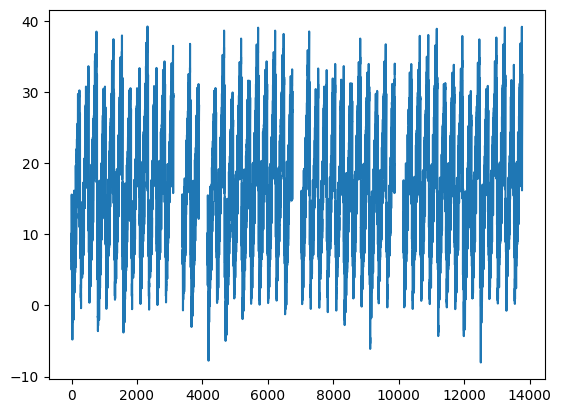

In [ ]:
plt.plot(X[:,6])

In [ ]:
np.unique(Y[Y[:,3] == 25][:,0])

array([ 2.,  4.,  5.,  7., 12., 13., 15., 23., 26., 27., 29., 34., 36.,
       39., 40., 43., 44., 46., 51., 55., 57., 59., 64., 69., 70., 75.,
       76., 77., 80., 81., 83., 84., 87., 88., 89., 91., 92., 98.])

In [ ]:
np.unique(YBin[:,-2])

array([0.        , 1.        , 1.11650485, 1.19791667, 1.43161094,
       1.67151163, 2.03396226, 3.14      , 3.9057971 , 5.22727273])

In [ ]:
Y[Y[:,5]>0].shape

(37579, 6)

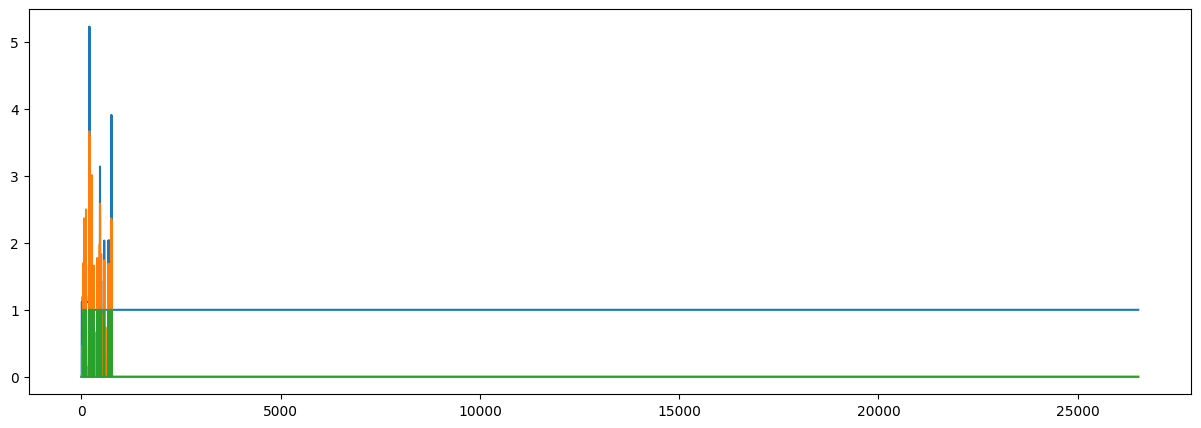

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Y[:,-2])
plt.plot(Y[:,-1])
plt.plot(YBin[:,-1])

In [ ]:
np.sum(YBin[Y[:,3] == 1][:,-1])

751.0

In [ ]:
firepoint = firepoint[(firepoint['date'] > '2023-01-01') & (firepoint['date'] < '2023-10-04') ]
firepoint['date'] = [allDates.index(date) for date in firepoint.date]
y = np.ones(len(firepoint))
x = firepoint.date

In [ ]:
YBin = np.copy(Y)
YBin[:,-2] = YBin[:,-1] > 0

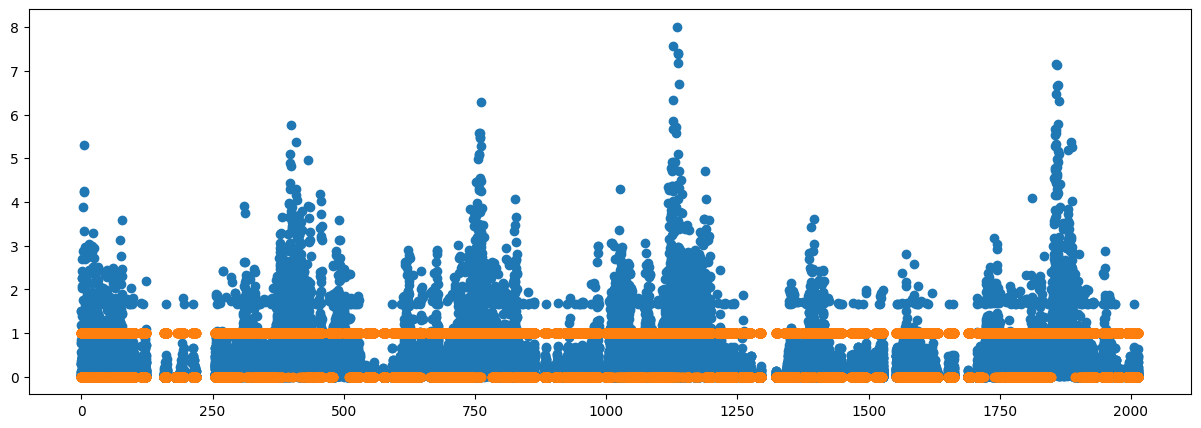

In [ ]:
plt.figure(figsize=(15,5))
#plt.scatter(YBin[Y[:,3] == 25][:,4], Y[Y[:,3] == 25][:,-2])
plt.scatter(YBin[Y[:,3] == 25][:,4], Y[Y[:,3] == 25][:,-1])
plt.scatter(YBin[Y[:,3] == 25][:,4], YBin[Y[:,3] == 25][:,-2])

In [ ]:
np.unique(YBin[:,0])

array([  0.,   1.,   2.,   3.,   4.,   5.,   7.,   8.,   9.,  10.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        39.,  40.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,
        52.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,
        64.,  65.,  67.,  70.,  71.,  72.,  73.,  75.,  76.,  77.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  98.,  99., 101., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118.])

In [ ]:
YBin[(YBin[:,0] == 2) & (YBin[:,4] == 2073)][:,-1]

array([0.])

In [ ]:
YBin[(YBin[:,4] == 2074)][:,-1], Y[(Y[:,4] == 2074)][:,0]

(array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   7.,   8.,   9.,  10.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  21.,  22.,  23.,  24.,
         25.,  26.,  27.,  28.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
         39.,  40.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,
         52.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,
         64.,  65.,  67.,  70.,  71.,  72.,  73.,  75.,  76.,  77.,  79.,
         80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
         91.,  92.,  93.

In [ ]:
YBin[(YBin[:,4] == 2073)][:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

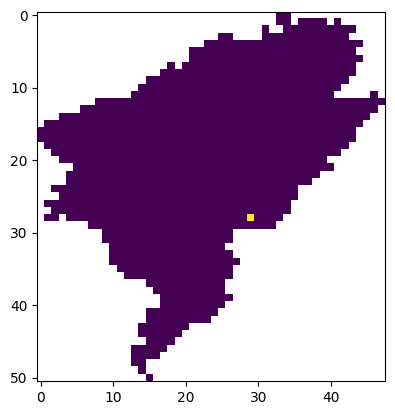

In [ ]:
plt.imshow(bin[:,:,2075])

In [ ]:
firepoint

,date_debut,date_fin,1er engin SLL,raison_sortie,date,geometry,latitude,longitude,IN,type,coef,label,altitude,h3,scale
2765,2023-01-10 18:09:48,2023-01-10 19:51:29,-,NATURELS,2038,POINT (6.252583644154578 47.30947220067402),47.309472,6.252584,True,NATURELS,1,1,260.0,871f828e1ffffff,90
2766,2023-02-09 18:13:13,2023-02-09 19:34:54,2023-02-09 18:26:13,NATURELS,2068,POINT (6.882795615283376 47.42495144013152),47.424951,6.882796,True,NATURELS,1,1,0.0,871f82b4bffffff,111
2767,2023-02-13 17:38:28,2023-02-13 19:30:55,2023-02-13 17:59:03,NATURELS,2072,POINT (6.80571257239119 47.34940666527785),47.349407,6.805713,True,NATURELS,1,1,0.0,871f82a70ffffff,63
2768,2023-02-15 17:06:24,2023-02-15 17:38:51,2023-02-15 17:16:21,NATURELS,2074,POINT (6.052971523002236 47.24917343655492),47.249173,6.052972,True,NATURELS,1,1,0.0,871f828aaffffff,98
2769,2023-02-16 16:00:24,2023-02-16 16:36:29,2023-02-16 16:22:07,NATURELS,2075,POINT (6.5364849265341 46.995227573854905),46.995228,6.536485,True,NATURELS,1,1,965.0,871f8205dffffff,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,2023-08-26 06:43:58,2023-08-26 07:33:27,2023-08-26 06:58:19,NATURELS,2266,POINT (6.315552969460393 46.929482129860986),46.929482,6.315553,True,NATURELS,1,1,0.0,871f820f4ffffff,46
2973,2023-08-31 21:15:38,2023-08-31 23:09:11,2023-08-31 21:34:08,NATURELS,2271,POINT (6.580298042930016 47.22287875831443),47.222879,6.580298,True,NATURELS,1,1,740.0,871f82aa3ffffff,95
2974,2023-09-02 03:55:54,2023-09-02 05:45:22,2023-09-02 04:12:35,NATURELS,2273,POINT (6.88968342990473 47.265828259997825),47.265828,6.889683,True,NATURELS,1,1,0.0,871f82aedffffff,87
2975,2023-09-02 15:19:34,2023-09-02 17:29:32,2023-09-02 15:35:53,NATURELS,2273,POINT (6.088833947084734 47.341352484097094),47.341352,6.088834,True,NATURELS,1,1,250.0,871f82811ffffff,44


In [ ]:
np.unique(raster)

array([ 2.,  4.,  5.,  7., 12., 13., 15., 23., 26., 27., 29., 34., 36.,
       39., 40., 43., 44., 46., 51., 55., 57., 59., 64., 69., 70., 75.,
       76., 77., 80., 81., 83., 84., 87., 88., 89., 91., 92., 98., nan],
      dtype=float32)

In [ ]:
X.shape

(26520, 162)

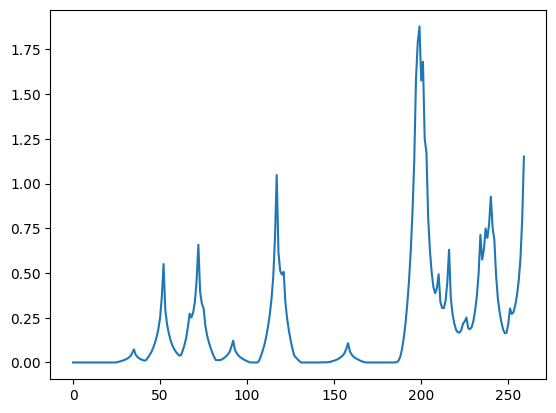

In [ ]:
plt.plot(X[X[:,0] == 0][:,-4])

In [ ]:
X[X[:,0] == 0].shape

(260, 162)

In [ ]:
Y[Y[:,0] == 0].shape

(260, 7)

In [ ]:
np.sum(YBin[:,-1])

26.0

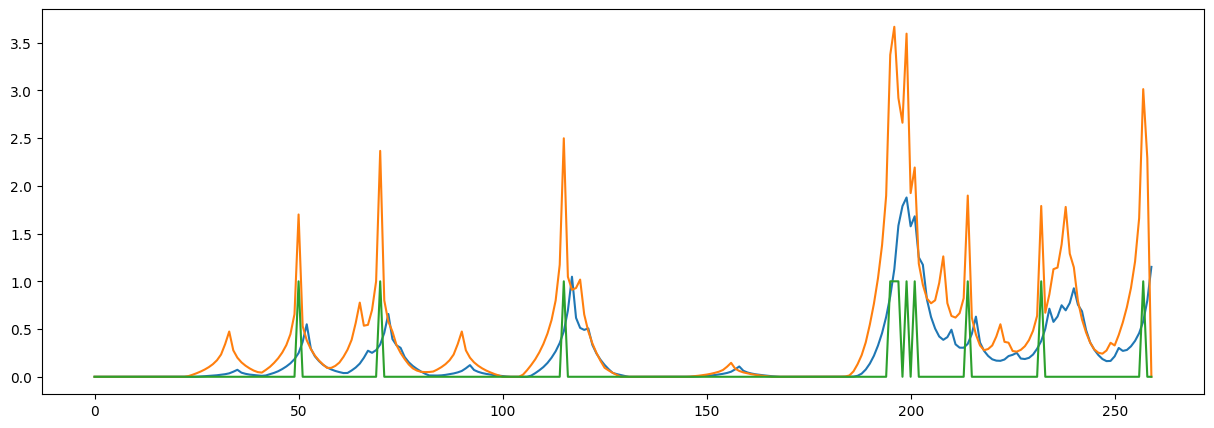

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(X[X[:,0] == 0][:,-4])
plt.plot(Y[Y[:,0] == 0][:,-1])
plt.plot(YBin[Y[:,0] == 0][:,-1])

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Y[Y[:,0] == 3][:,-2])

In [ ]:
np.unique(Y[:,-1])

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128,

(array([4.1414e+04, 3.1360e+03, 9.0700e+02, 2.7700e+02, 9.5000e+01,
        3.7000e+01, 1.4000e+01, 7.0000e+00, 1.0000e+00, 5.0000e+00]),
 array([ 0.    ,  1.0569,  2.1138,  3.1707,  4.2276,  5.2845,  6.3414,
         7.3983,  8.4552,  9.5121, 10.569 ]),
 <BarContainer object of 10 artists>)

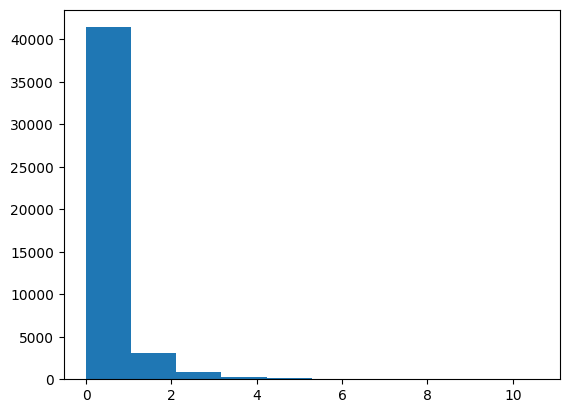

In [ ]:
plt.hist(Y[:,-1])

In [ ]:
YBin[:,-1][(Y[:,-1] > 0.1) & (Y[:,-1] < 0.2)]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
quantile_prediction_error(torch.tensor(YBin[:,-1], dtype=torch.float32), torch.tensor(Y[:,-1], dtype=torch.float32), 'mean')

0.21435234 0.0
1.5277762 0.30070153
2.5212095 0.62844545
3.586372 0.68231046
4.6870737 0.7368421
5.7341623 0.7567568
6.820286 1.0
7.777286 0.85714287
8.943 1.0
9.90975 1.0


4.4759073

In [ ]:
graph.X[graph.X[:,3] == 78][:,5]

array([100., 100., 100., ..., 139., 139., 139.])

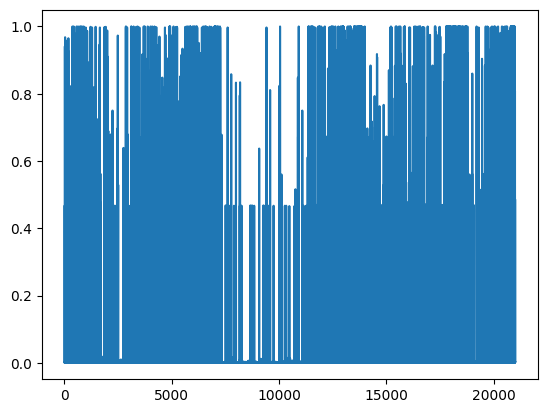

In [ ]:
plt.plot(Y[:,-1])

(array([142659.,   6579.,   2161.,  10701.,   1310.]),
 array([0.  , 0.5 , 0.75, 1.  , 2.  , 3.  ]),
 <BarContainer object of 5 artists>)

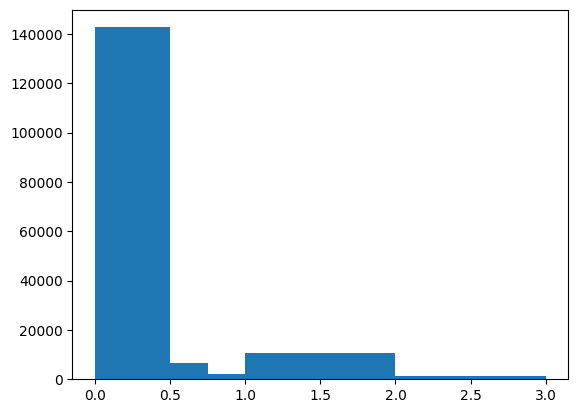

In [ ]:
plt.hist(Y[:,-1], bins=[0,0.5,0.75,1,2,3])

In [ ]:
np.unique(graph.X[:,3])

array([ 1., 25., 78.])

<Axes: >

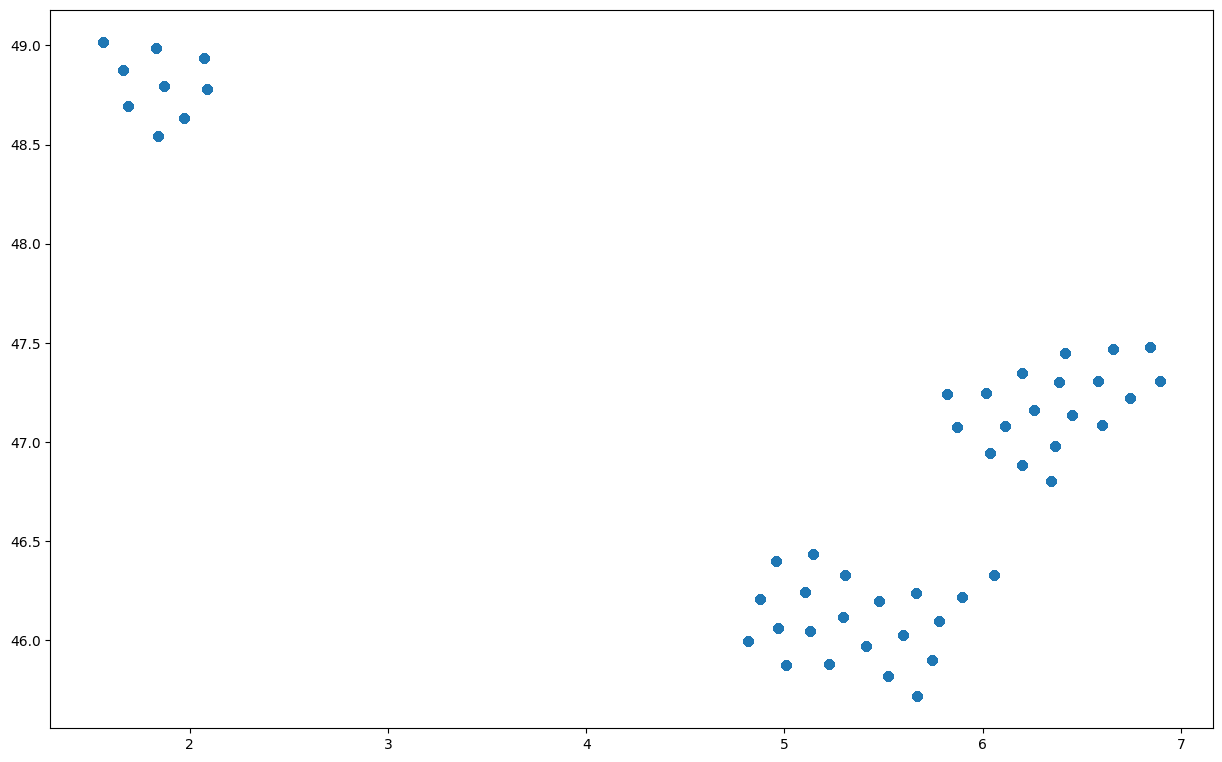

In [ ]:
geo = gpd.GeoDataFrame(geometry=gpd.points_from_xy(graph.X[:,1], graph.X[:,2]))
geo['elevation'] = graph.Y[:,-1]
geo.plot(figsize=(15,15))

0.26494083441510796 0.8696011440457618 0.07167263236390753


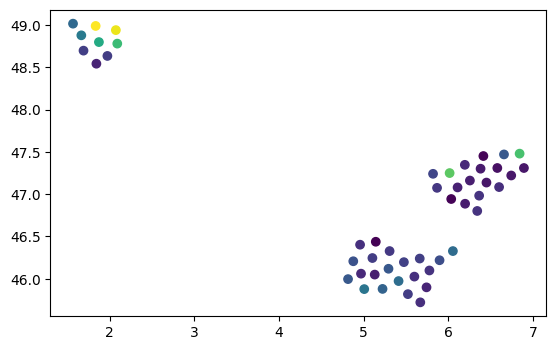

In [ ]:
geo2 = geo.groupby('geometry')['elevation'].mean().reset_index()
geo3 = gpd.GeoDataFrame(geometry=geo2.geometry)
geo3['elevation'] = geo2['elevation']
geo3.plot(column='elevation')
print(geo3.elevation.mean(), geo3.elevation.max(), geo3.elevation.min())

In [ ]:
Y.shape

(52505, 7)

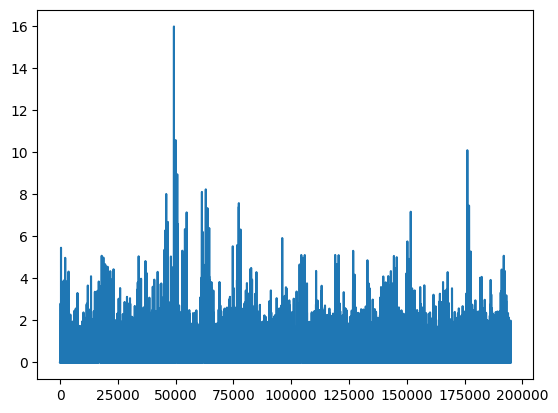

In [ ]:
ind = np.lexsort((Y[:,4], Y[:,0]))
order = Y[ind]
plt.plot((order[:,-1]))

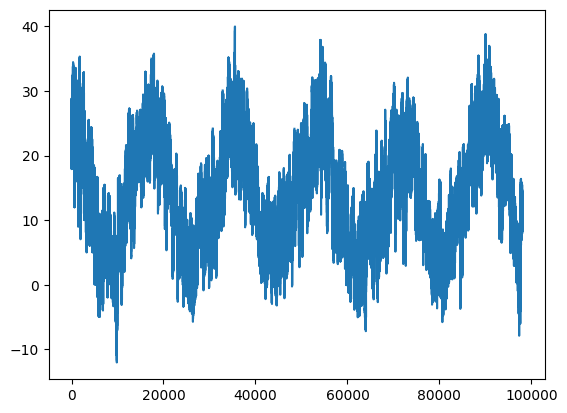

In [ ]:
fig, ax = plt.subplots(1, figure=(15,5))

ind = np.lexsort([Y[:,4]])
order = X[ind]
ax.plot(order[:,6])
#ax.plot(order[:,31])

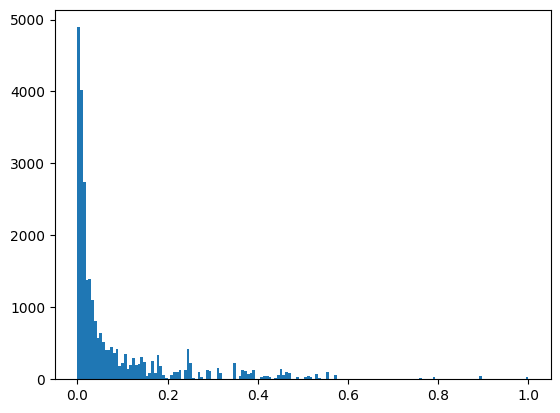

In [ ]:
plt.hist(order[:,-1], bins='auto')
plt.show()

In [ ]:
nodes = graph.X
graphIds = np.unique(nodes[:,5])

size = []
dates = []
for graphid in graphIds:
    size.append(nodes[nodes[:,5] == graphid].shape[0])
    dates.append(np.unique(nodes[nodes[:,5] == graphid][:,4]).shape[0])

print(graphIds[np.argwhere(size == np.max(size))])

print(graphIds[np.argwhere(size == 13)])

[[  0.]
 [  1.]
 [  2.]
 [  3.]
 [  4.]
 [  5.]
 [  6.]
 [  7.]
 [  8.]
 [  9.]
 [ 10.]
 [ 11.]
 [ 12.]
 [ 13.]
 [ 14.]
 [ 15.]
 [ 16.]
 [ 17.]
 [ 18.]
 [ 19.]
 [ 20.]
 [ 21.]
 [ 22.]
 [ 23.]
 [ 24.]
 [ 25.]
 [ 26.]
 [ 27.]
 [ 28.]
 [ 29.]
 [ 30.]
 [ 31.]
 [ 32.]
 [ 33.]
 [ 34.]
 [ 35.]
 [ 36.]
 [ 37.]
 [ 38.]
 [ 39.]
 [ 40.]
 [ 41.]
 [ 42.]
 [ 43.]
 [ 44.]
 [ 45.]
 [ 46.]
 [ 47.]
 [ 48.]
 [ 49.]
 [ 50.]
 [ 51.]
 [ 52.]
 [ 53.]
 [ 54.]
 [ 55.]
 [ 56.]
 [ 57.]
 [ 58.]
 [ 59.]
 [ 60.]
 [ 61.]
 [ 62.]
 [ 63.]
 [ 64.]
 [ 65.]
 [ 66.]
 [ 67.]
 [ 68.]
 [ 69.]
 [ 70.]
 [ 71.]
 [ 72.]
 [ 73.]
 [ 74.]
 [ 75.]
 [ 76.]
 [ 77.]
 [ 78.]
 [ 79.]
 [ 80.]
 [ 81.]
 [ 82.]
 [ 83.]
 [ 84.]
 [ 85.]
 [ 86.]
 [ 87.]
 [ 88.]
 [ 89.]
 [ 90.]
 [ 91.]
 [ 92.]
 [ 93.]
 [ 94.]
 [ 95.]
 [ 96.]
 [ 97.]
 [ 98.]
 [ 99.]
 [100.]
 [101.]
 [102.]
 [103.]
 [104.]
 [105.]
 [106.]
 [107.]
 [108.]
 [109.]
 [110.]
 [111.]
 [112.]
 [113.]
 [114.]
 [115.]
 [116.]
 [117.]
 [118.]
 [119.]
 [120.]
 [121.]
 [122.]
 [123.]
 [124.]


In [ ]:
np.unique(size)

array([ 10,  20,  40,  60,  76,  80, 100, 114, 120])

In [ ]:
np.unique(size)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
print(graphIds[np.argwhere(size == np.unique(size)[9])])

[[ 421.]
 [ 460.]
 [ 468.]
 [ 654.]
 [1986.]
 [2127.]
 [2312.]
 [3016.]
 [3078.]
 [6160.]]


In [ ]:
graph.X[graph.X[:,5] == 11179]

array([[4.70000000e+01, 4.98762633e+00, 4.58900001e+01, ...,
        7.47741419e-02, 1.62194104e-01, 1.63115261e-01],
       [0.00000000e+00, 5.37884368e+00, 4.59693338e+01, ...,
        9.94515280e-02, 1.71393730e-01, 1.30327546e-01],
       [2.30000000e+01, 6.83802670e+00, 4.74821367e+01, ...,
        4.26461220e-02, 2.36615430e-01, 2.71288549e-01],
       ...,
       [1.50000000e+01, 5.65755384e+00, 4.62434403e+01, ...,
        6.38735691e-03, 1.73499745e-01, 1.67420405e-01],
       [4.20000000e+01, 6.05849674e+00, 4.69340218e+01, ...,
        7.26705280e-03, 2.03560835e-02, 7.66408623e-03],
       [2.90000000e+01, 6.05427776e+00, 4.71022063e+01, ...,
        2.60772433e-02, 1.81698265e-02, 1.18047537e-02]])

In [ ]:
unique = graph.X[graph.X[:,5] == 1903]

for u in unique:
    nei = graph.edges[1][graph.edges[0] == u[0]]
    m = np.argwhere(np.isin(graph.X[:,0], nei) & (graph.X[:,4] == u[4]))
    print(m.shape)

(2, 1)
(2, 1)
(2, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)


In [ ]:
graph.edges[1][np.argwhere((np.isin(graph.edges[1], [ 887., 3000., 2963., 2975., 1285., 1190., 2942., 1229., 3018.,
        391., 1059., 1105.,  135.,  369., 2864., 2996.,  334., 1076.,
       2962., 2913., 2835., 2998.,  251., 2999.,  982., 2828., 2863.,
       2982.,  620., 2943.])) & (graph.edges[0] == 1076))]

array([], shape=(0, 1), dtype=int64)

In [ ]:
graph.X[(graph.X[:,5] == 14618) & (np.isin(graph.X[:,0], [1076.0]))][:,0]

array([1076.])

In [ ]:
graph.X[graph.X[:,5] == 1][:,4]

array([680., 680., 680., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 680., 680., 680., 680., 679., 678.,
       677., 676., 675., 679., 678., 677., 676., 675., 679., 678., 677.,
       676., 675., 679., 678., 677., 676., 675., 679., 678., 677., 676.,
       675., 679., 678., 677., 676., 675., 679., 678., 677., 676., 675.,
       679., 678., 677., 676., 675., 679., 678., 677., 676., 675., 679.,
       678., 677., 676., 675., 679., 678., 677., 676., 675., 679., 678.,
       677., 676., 675., 679., 678., 677., 676., 675., 679., 678., 677.,
       676., 675., 679., 678., 677., 676., 675., 679., 678., 677., 676.,
       675., 679., 678., 677., 676., 675., 679., 678., 677., 676., 675.,
       679., 678., 677., 676., 675., 679., 678., 677., 676., 675.])

In [ ]:
X

array([[28.        ,  5.46865663, 46.17864005, ...,  0.        ,
         0.        ,  0.        ],
       [ 6.        ,  5.292747  , 46.11412999, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  5.75132142, 45.93599172, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  1.96556147, 48.63685383, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.96556147, 48.63685383, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.96556147, 48.63685383, ...,  0.        ,
         0.        ,  0.        ]])

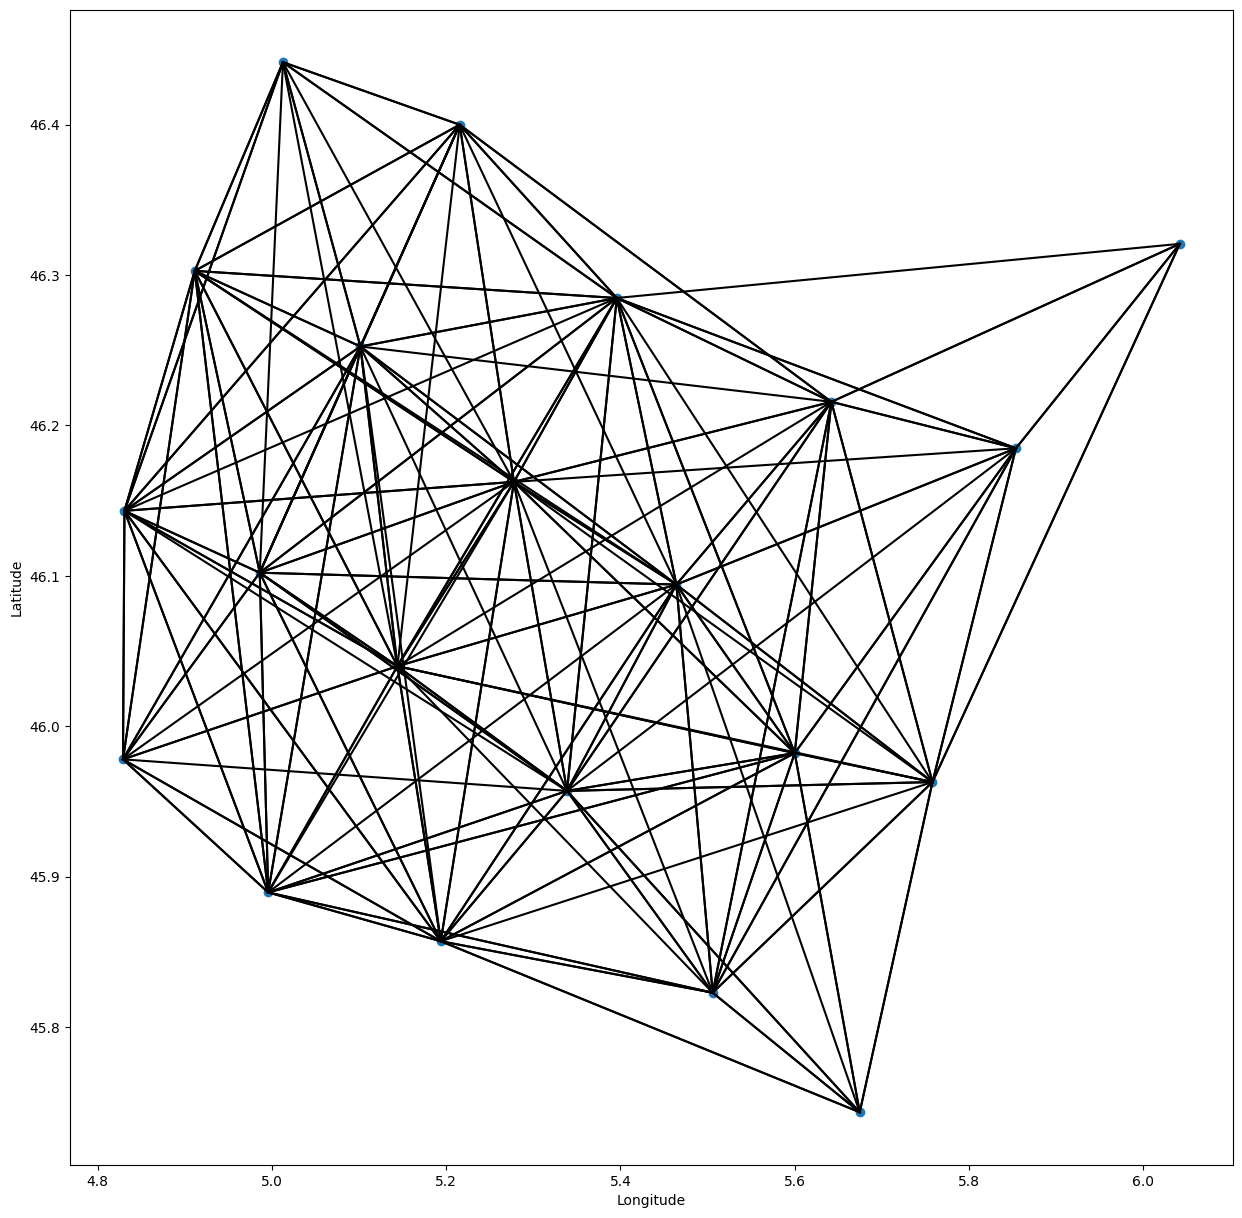

In [ ]:
graph._plot(X[X[:,4] == 1654], time=0)

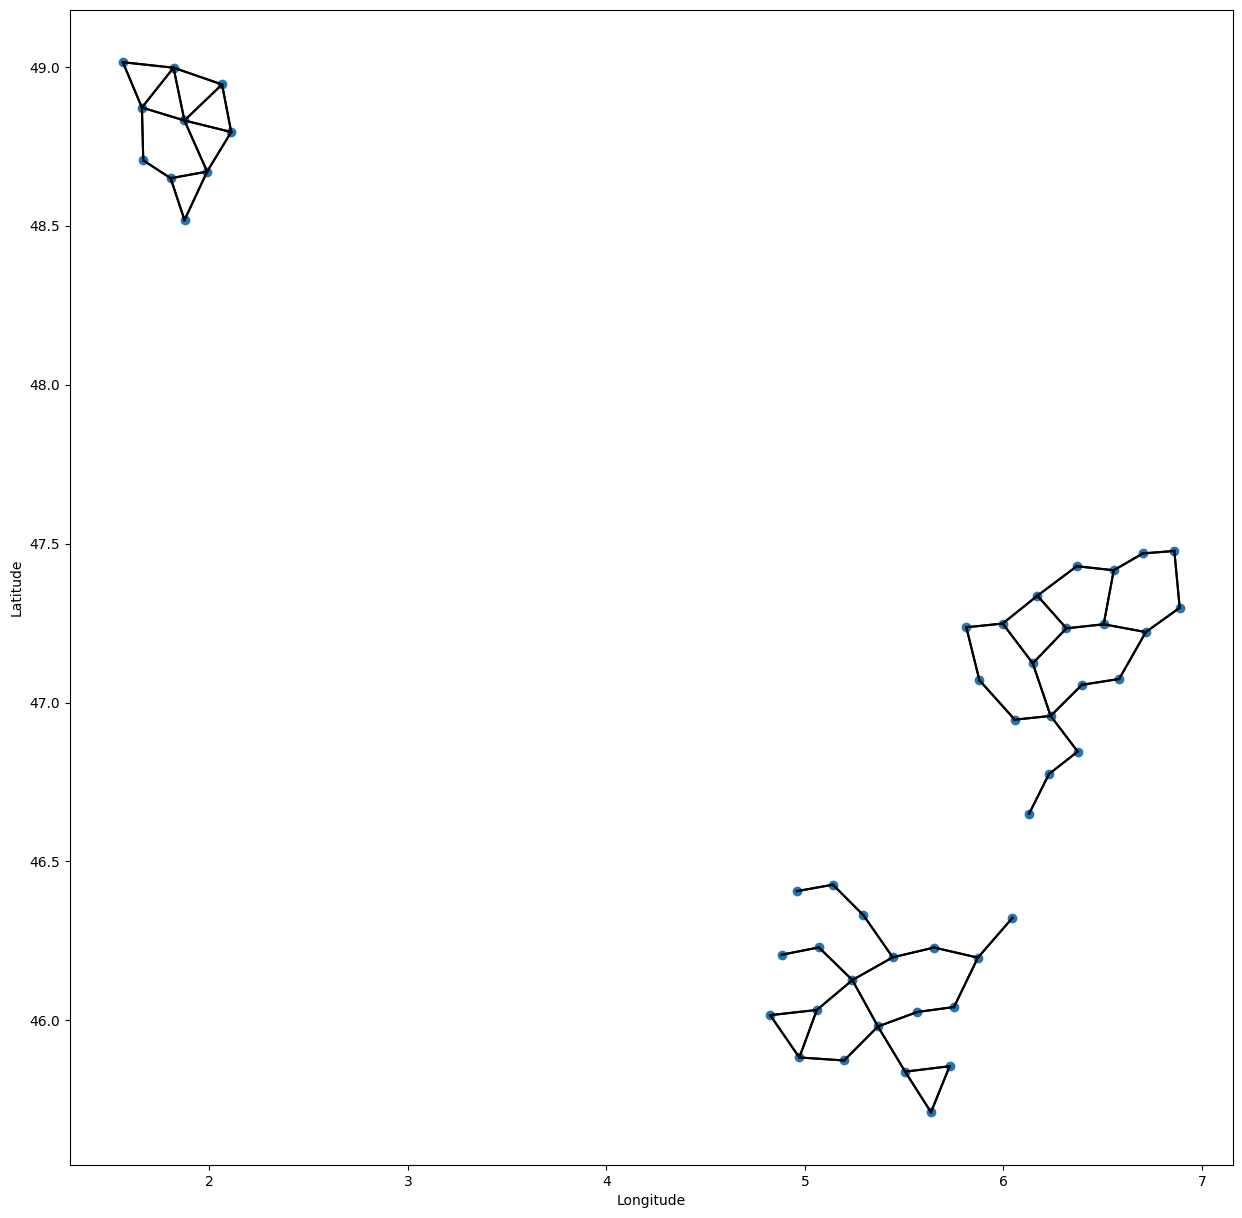

In [ ]:
graph._plot(graph.nodes, time=0)

In [ ]:
np.unique(graph.X[:,5] == -1)

array([False])

In [ ]:
graph.X[graph.X[:,5] == 588].shape

(16, 10)

[   0.    3.    5. ... 2775. 2776.   nan]


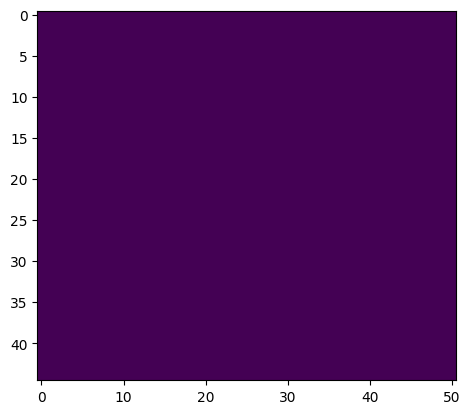

In [ ]:
raster = pickle.load(open('train/raster/departement-01-ainrasterScale0.pkl', 'rb'))
print(np.unique(raster[:,:]))
plt.imshow(raster == 781)

[584. 591. 833. 885.  nan]


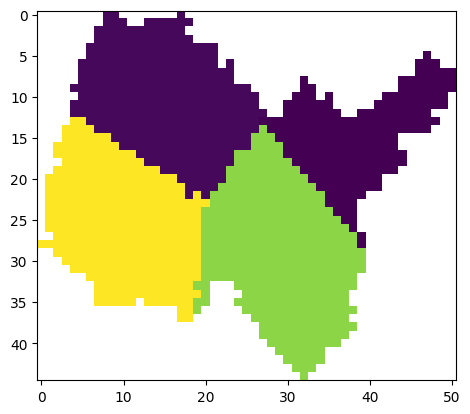

In [ ]:
raster = pickle.load(open('train/bin/departement-01-ainbinScale50.pkl', 'rb'))
print(np.unique(raster))
plt.imshow(raster[:,:,0])

[ 1. nan]


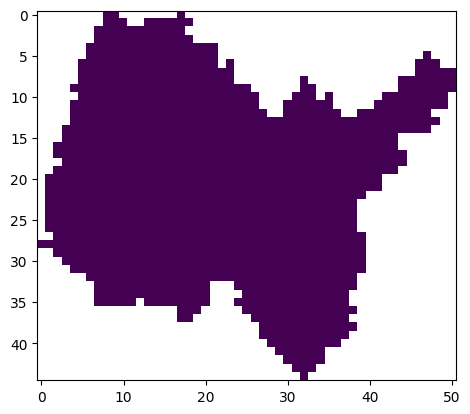

In [ ]:
raster = pickle.load(open('train/proba/departement-01-ainprobaScale50.pkl', 'rb'))
print(np.unique(raster[:,:,0]))
plt.imshow(raster[:,:,0])